# Climate Change Modeling Project
# Lakshman Chaudhary

In [35]:
#Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import os
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objs as go
import seaborn as sns
import sys


print("System Config ::\nPython ::",sys.version)

System Config ::
Python :: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [36]:
# Reading the dataset 
# Get the current working directory (cwd)
cwd = os.getcwd()   
# Get all the files in that directory
files = os.listdir(cwd) 
print("Files in %r: %s" % (cwd, files))

Files in 'C:\\Users\\laksh\\Downloads\\Climate-Change -Modelling-Project _NEW\\New folder': ['.ipynb_checkpoints', 'Climate_Change_Lchy.ipynb', 'climate_nasa.csv', 'DateVsLikesCount.jpeg', 'Decomposition_Plots.jpeg', 'Feature Engineering.jpeg', 'Forecasted_Likes_Count.jpeg', 'Likes Count Forecast_00.jpeg', 'Likes Count Forecast_01.jpeg', 'Likes Count Forecast_02.jpeg', 'Likes Count Forecast_2.jpeg', 'Likes Count Forecast_3.jpeg', 'Likes Count Forecast_4.jpeg', 'Likes Count Forecast_5.jpeg', 'Likes Count Forecast__001.jpeg', 'Likes Count Forecast__002.jpeg', 'likesCountVs2020-2023.jpeg', 'Likes_Count_Forecast_03.jpeg', 'Likes_Count_Predictions.jpeg', 'Likes_Count_with_SMA.jpeg', 'Original.jpeg', 'Original_1.jpeg', 'Original_2.jpeg', 'Predicted Likes Count.jpeg', 'Predicted Likes Count_1.jpeg', 'Predicted vs Actual Likes Count.jpeg', 'Predicted_Likes_Count1.jpeg', 'Predicted_Likes_Count_001.jpeg', 'Predicted_Likes_Count_ARIMA.jpeg', 'Predicted_Likes_Count_ARIMA_2.jpeg', 'Predicted_vs_Act

In [458]:
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [459]:
data

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


# Now we will explore the all the basic aspects of the dataset

In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


In [461]:
# Coloumn names of the dataset
data.columns

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')

# Here we can see the basic structure of the dataset .i.e. Types of Column exist in the dataset. It gives us the rough idea about what kind of data we are dealing with and what kind of transformation we need to bring in the dataset

In [462]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [463]:
# First 5 Records in the dataset
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [464]:
# Last 5 Records in the dataset
data.tail()

,date,likesCount,profileName,commentsCount,text
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes
521,2022-12-22T17:00:08.000Z,12,cc70f6c9dcc2637b1c5fd90046834612627c752b828cb4...,1.0,"We're experiencing severe, abnormal weather pa..."


In [225]:
# Lets see the number of Null values in each column 
data.isnull().sum()

likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [466]:
#Droping all null values
data = data.dropna(how='any' ,axis=0)
data.shape

(242, 5)

In [467]:
# Here we can see the unique values exist in each column
data.nunique()

date             242
likesCount        39
profileName      229
commentsCount     39
text             242
dtype: int64

In [468]:
# All Null Values record dropped 
data.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [226]:
data.rename(columns={'date' : 'likesCount','profileName ': 'confidence_interval_temp'},inplace=True)
data.head()

,likesCount,profileName,commentsCount,text
date,,,,
2020-09-15 21:25:05+00:00,27,e332cfd3f53d89cdd75a57b80d011e2f5984437cc51340...,6.0,I wish this was simply old news and we had peo...
2020-09-15 21:30:35+00:00,7,7d6065e313e1919d05a309bd59754895d9518d3ca8e8ba...,8.0,The sad thing is that if we look at projected ...
2020-09-15 21:32:15+00:00,4,930f8ce8e022378d44088377fef6a069da6c519c2e5ba1...,NaN,We all play a part....as a world we need to do...
2020-09-15 21:36:05+00:00,3,00febfebfa7073f73c576deb9dba73eb9f98e26bb03f3d...,7.0,Re ord being from 1860 something...lolol
2020-09-15 21:36:59+00:00,16,6c5e0b507471c121613153d3459e97b050dd47d1ec744c...,8.0,The climate is changing but it’s ridiculous to...


In [227]:
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

print(data.columns)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


In [471]:

print(data.columns)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


In [472]:
import pandas as pd

# Example DataFrame with the columns provided
# data = pd.DataFrame({
#     'date': ['2023-01-01', '2023-01-02'],
#     'likesCount': [10, 20],
#     'profileName': ['profile1', 'profile2'],
#     'commentsCount': [5, 10],
#     'text': ['text1', 'text2']
# })

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data.set_index('date', inplace=True)

# Drop columns if not needed
# If you only need 'likesCount' as the main column
data.drop(columns=['profileName', 'commentsCount', 'text'], inplace=True, errors='ignore')

# Display the updated DataFrame
print(data.head())


                           likesCount
date                                 
2022-09-07 17:12:32+00:00           2
2022-09-08 14:51:13+00:00           0
2022-09-07 17:19:41+00:00           1
2022-09-08 00:51:30+00:00           4
2022-09-07 19:06:20+00:00          16


In [24]:
#Converting 'Date column' into 'Datetime datatype'

import pandas as pd
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

print(data.columns)

# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' as the index
data.set_index('date', inplace=True)

# Drop columns if necessary
data.drop(columns=['likesCount'], inplace=True, errors='ignore')

# Display the DataFrame index
print(data.index)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')
DatetimeIndex(['2022-09-07 17:12:32+00:00', '2022-09-08 14:51:13+00:00',
               '2022-09-07 17:19:41+00:00', '2022-09-08 00:51:30+00:00',
               '2022-09-07 19:06:20+00:00', '2022-09-15 17:10:57+00:00',
               '2022-09-07 17:31:25+00:00', '2022-09-07 18:07:53+00:00',
               '2022-09-07 22:45:56+00:00', '2022-09-07 16:30:55+00:00',
               ...
               '2022-12-22 17:54:41+00:00', '2022-12-22 17:51:29+00:00',
               '2022-12-22 17:46:40+00:00', '2022-12-22 17:44:23+00:00',
               '2022-12-22 17:41:51+00:00', '2022-12-22 17:21:37+00:00',
               '2022-12-22 17:19:51+00:00', '2022-12-22 17:12:57+00:00',
               '2022-12-22 17:01:12+00:00', '2022-12-22 17:00:08+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=522, freq=None)


In [25]:
data.head()

,profileName,commentsCount,text
date,,,
2022-09-07 17:12:32+00:00,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
2022-09-08 14:51:13+00:00,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2022-09-07 17:19:41+00:00,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
2022-09-08 00:51:30+00:00,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
2022-09-07 19:06:20+00:00,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [26]:
# Now we use year as index
data['date']= data.index.date
data.head()

,profileName,commentsCount,text,date
date,,,,
2022-09-07 17:12:32+00:00,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,2022-09-07
2022-09-08 14:51:13+00:00,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,2022-09-08
2022-09-07 17:19:41+00:00,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022-09-07
2022-09-08 00:51:30+00:00,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,2022-09-08
2022-09-07 19:06:20+00:00,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022-09-07


In [27]:
# Now we use year as index
data['Year']= data.index.year
data.head()

,profileName,commentsCount,text,date,Year
date,,,,,
2022-09-07 17:12:32+00:00,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,2022-09-07,2022
2022-09-08 14:51:13+00:00,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...,2022-09-08,2022
2022-09-07 17:19:41+00:00,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...,2022-09-07,2022
2022-09-08 00:51:30+00:00,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...,2022-09-08,2022
2022-09-07 19:06:20+00:00,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart...",2022-09-07,2022


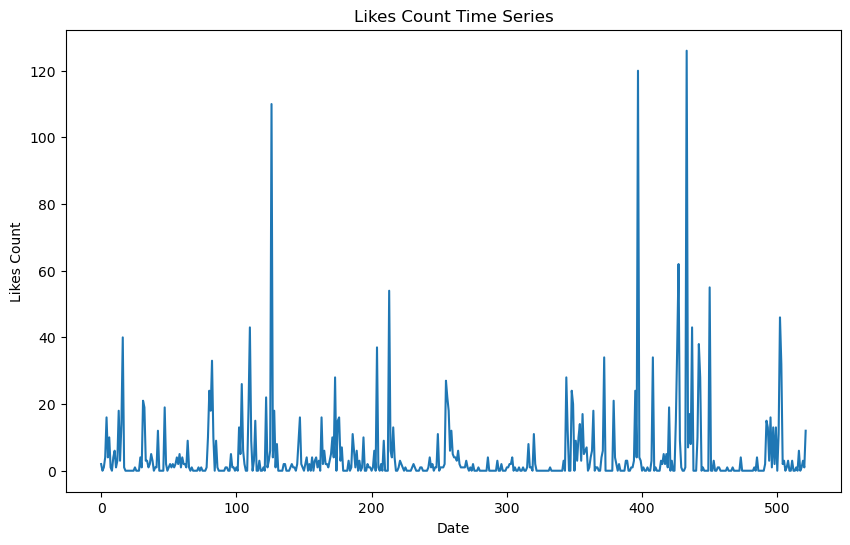

In [28]:
# Plot likesCount time series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data
plt.figure(figsize=(10, 6))
plt.plot(data['likesCount'])
plt.title('Likes Count Time Series')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.savefig('DateVsLikesCount.jpeg') 
plt.show()

In [478]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Check the split
print(f"Training set size: {train.shape}")
print(f"Testing set size: {test.shape}")


Training set size: (417, 5)
Testing set size: (105, 5)


In [479]:
# Create and train linear regression model for likesCount
model = LinearRegression()
model.fit(train.index.values.reshape(-1, 1), train['likesCount'])


LinearRegression()

In [228]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression

# Ensure 'likesCount' exists in the data
if 'likesCount' in train.columns:
    # Create and train linear regression model
    model = LinearRegression()

    # Reshape the index values (dates) as features (assuming a time-based model)
    X_train = train.index.values.reshape(-1, 1)
    y_train = train['likesCount']

    # Fit the model
    model.fit(X_train, y_train)

    # Print the model coefficients
    print(f"Intercept: {model.intercept_}")
    print(f"Coefficient: {model.coef_}")
else:
    print("'likesCount' column not found in the data.")


Intercept: -34.60413607400717
Coefficient: [2.40137878e-17]


In [229]:
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

print(data.columns)

print(test.columns)

Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')
Index(['likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


In [230]:
print(test.columns)

Index(['likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


[-34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413

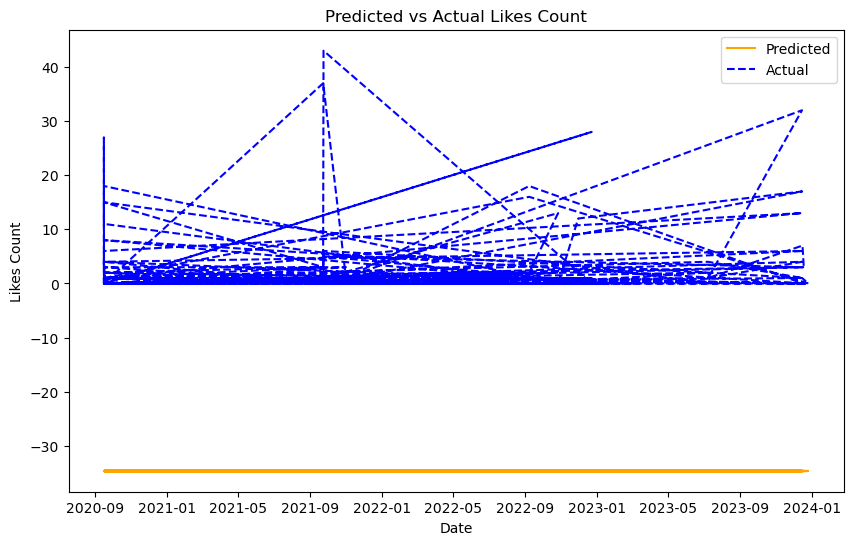

In [234]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Check if the index is already a DatetimeIndex, if not, convert it
if not isinstance(test.index, pd.DatetimeIndex):
    test.index = pd.to_datetime(test.index)

# Convert date index to numeric representation
test_dates_num = mdates.date2num(test.index.to_pydatetime())

# Make predictions on test set
predictions = model.predict(test_dates_num.reshape(-1, 1))

# Print predictions (optional)
print(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, predictions, label='Predicted', color='orange')
plt.plot(test.index, test['likesCount'], label='Actual', color='blue', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Predicted vs Actual Likes Count')
plt.legend()

# Save the plot as an image file
plt.savefig('Predicted_vs_Actual_Likes_Count_1.jpeg')

# Display the plot
plt.show()


[-34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413607 -34.60413607 -34.60413607 -34.60413607 -34.60413607
 -34.60413

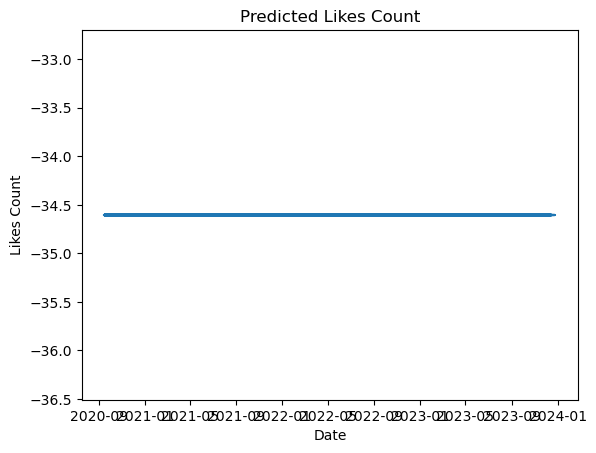

In [236]:
import matplotlib.pyplot as plt

# Convert date index to numeric representation
test_dates_num = mdates.date2num(test.index.to_pydatetime())

# Make predictions on test set
predictions = model.predict(test_dates_num.reshape(-1, 1))

# Print predictions
print(predictions)


# Visualize predictions
plt.plot(test.index, predictions)
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Predicted Likes Count')
plt.savefig('Predicted Likes Count.jpeg')
plt.show()

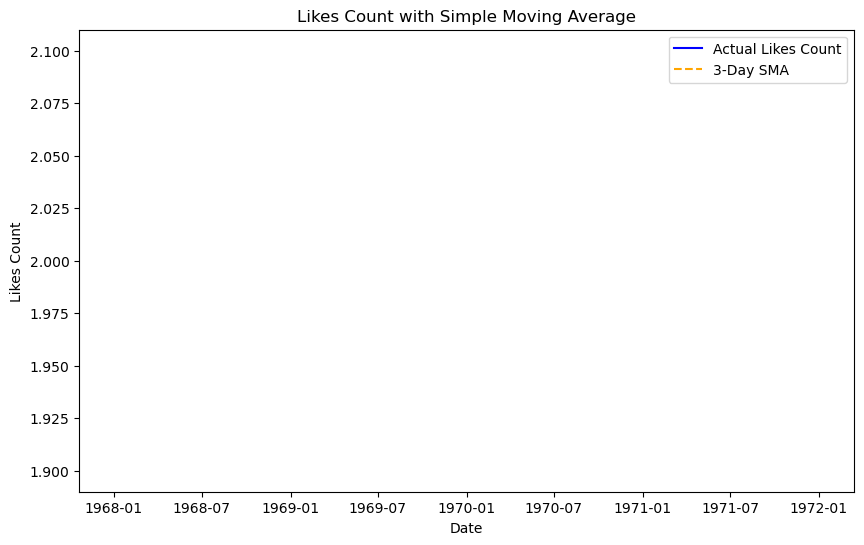

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (Replace this with your actual DataFrame)
# data = pd.read_csv('your_data.csv', parse_dates=['date'], index_col='date')
# Ensure that 'likesCount' is your target variable

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

# Convert index to DatetimeIndex if necessary
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Set the frequency of the time series (e.g., daily frequency 'D')
data = data.asfreq('D')

# Calculate Simple Moving Average (SMA)
window_size = 3  # Adjust window size as needed
data['SMA'] = data['likesCount'].rolling(window=window_size).mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['likesCount'], label='Actual Likes Count', color='blue')
plt.plot(data.index, data['SMA'], label=f'{window_size}-Day SMA', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Likes Count with Simple Moving Average')
plt.legend()
plt.savefig('Likes_Count_with_SMA.jpeg')
plt.show()


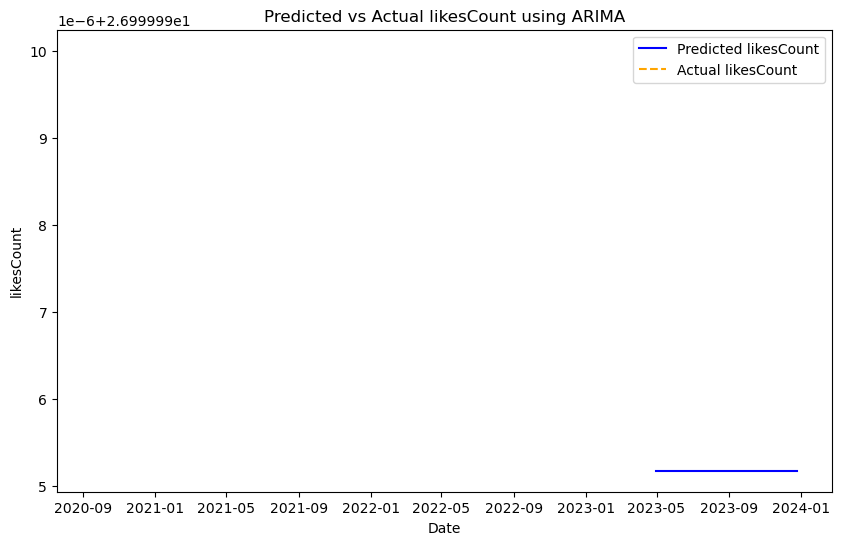

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Load climate_nasa.csv dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')

# Ensure 'likesCount' is the target variable
target_variable = 'likesCount'  # Replace with your target variable

# Handle missing data
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Convert index to DatetimeIndex if necessary
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Set the frequency of the time series (e.g., daily frequency 'D')
data = data.asfreq('D')

# Split data into training and testing sets (80% for training)
train_size = int(0.8 * len(data))
train_data, test_data = data[:train_size], data[train_size:]

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module='statsmodels')

# Fit simplified ARIMA model
model = ARIMA(train_data[target_variable], order=(1,0,1))
fitted_model = model.fit()

# Forecasting
n_periods = len(test_data)
forecast_result = fitted_model.get_forecast(steps=n_periods)
predictions = forecast_result.predicted_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, predictions, label='Predicted ' + target_variable, color='blue')
plt.plot(data.index, data[target_variable], label='Actual ' + target_variable, color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.title('Predicted vs Actual ' + target_variable + ' using ARIMA')
plt.legend()
plt.savefig('Predicted_vs_Actual_' + target_variable + '_ARIMA.jpeg')
plt.show()


In [261]:
import pandas as pd

# Load the dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')

# Display the first few rows and column names of the dataset
print(data.head())
print(data.columns)


                           likesCount  \
date                                    
2022-09-07 17:12:32+00:00           2   
2022-09-08 14:51:13+00:00           0   
2022-09-07 17:19:41+00:00           1   
2022-09-08 00:51:30+00:00           4   
2022-09-07 19:06:20+00:00          16   

                                                                 profileName  \
date                                                                           
2022-09-07 17:12:32+00:00  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
2022-09-08 14:51:13+00:00  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2022-09-07 17:19:41+00:00  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   
2022-09-08 00:51:30+00:00  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...   
2022-09-07 19:06:20+00:00  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...   

                           commentsCount  \
date                                       
2022-09-07 17:12:32+00:00            NaN   
2022-09-08 14:51:13

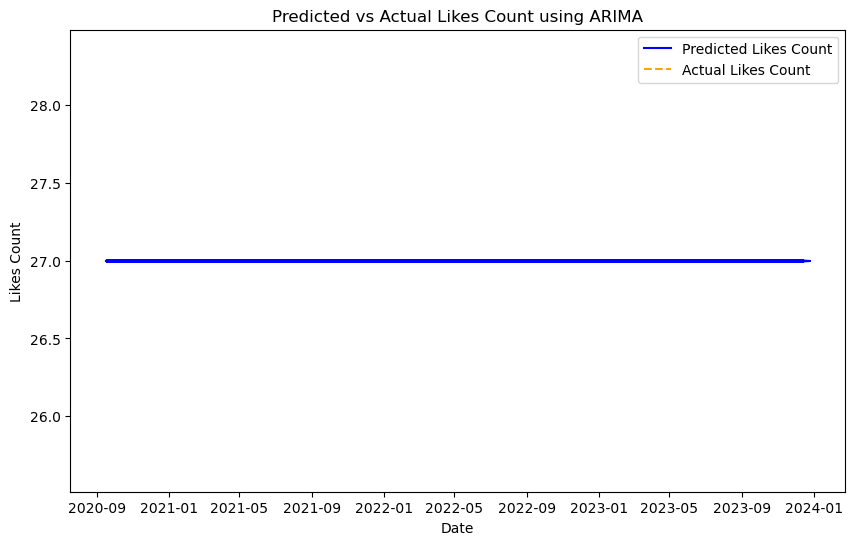

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample DataFrame creation (Replace this with your actual DataFrame)
# data = pd.read_csv('your_data.csv', parse_dates=['date'], index_col='date')
# Ensure that 'likesCount' is your target variable

# Convert index to DatetimeIndex if necessary
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Set the frequency of the time series (e.g., daily frequency 'D')
data = data.asfreq('D')

# Fit the ARIMA model
model = ARIMA(data['likesCount'], order=(1, 1, 1))  # Replace (p, d, q) with your chosen ARIMA parameters
fitted_model = model.fit()

# Forecasting
n_periods = len(test.index)  # Assuming 'test' is your DataFrame for testing
forecast_result = fitted_model.get_forecast(steps=n_periods)
predictions = forecast_result.predicted_mean

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test.index, predictions, label='Predicted Likes Count', color='blue')
plt.plot(data.index, data['likesCount'], label='Actual Likes Count', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Predicted vs Actual Likes Count using ARIMA')
plt.legend()
plt.savefig('Predicted_vs_Actual_Likes_Count_ARIMA_1.jpeg')
plt.show()


2023-04-29 21:25:05+00:00    26.999995
2023-04-30 21:25:05+00:00    26.999995
2023-05-01 21:25:05+00:00    26.999995
2023-05-02 21:25:05+00:00    26.999995
2023-05-03 21:25:05+00:00    26.999995
                               ...    
2023-08-07 21:25:05+00:00    26.999995
2023-08-08 21:25:05+00:00    26.999995
2023-08-09 21:25:05+00:00    26.999995
2023-08-10 21:25:05+00:00    26.999995
2023-08-11 21:25:05+00:00    26.999995
Freq: D, Name: predicted_mean, Length: 105, dtype: float64


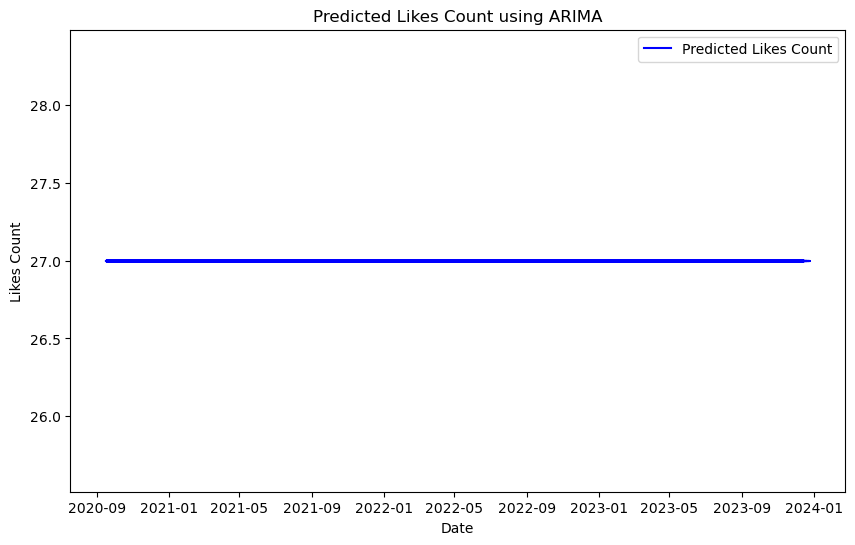

In [275]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure test.index is a DatetimeIndex
if not isinstance(test.index, pd.DatetimeIndex):
    test.index = pd.to_datetime(test.index)

# Fit the ARIMA model
try:
    fitted_model = model.fit()  # Fit the model if not already fitted
except Exception as e:
    print(f"Error fitting the model: {e}")
    raise

# Check that the model has a get_forecast method
if not hasattr(fitted_model, 'get_forecast'):
    raise AttributeError("The fitted model must have a 'get_forecast' method to make predictions.")

# Number of steps to forecast (based on the length of the test set)
n_periods = len(test.index)

# Generate predictions using the fitted model's forecast method
try:
    forecast_result = fitted_model.get_forecast(steps=n_periods)
    predictions = forecast_result.predicted_mean
except Exception as e:
    print(f"Error in forecasting: {e}")
    raise

# Print predictions for verification
print(predictions)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(test.index, predictions, label='Predicted Likes Count', color='blue')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Predicted Likes Count using ARIMA')
plt.legend()
plt.savefig('Predicted_Likes_Count_ARIMA_2.jpeg')
plt.show()


[4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705
 4.55897705 4.55897705 4.55897705 4.55897705 4.55897705 4.5589

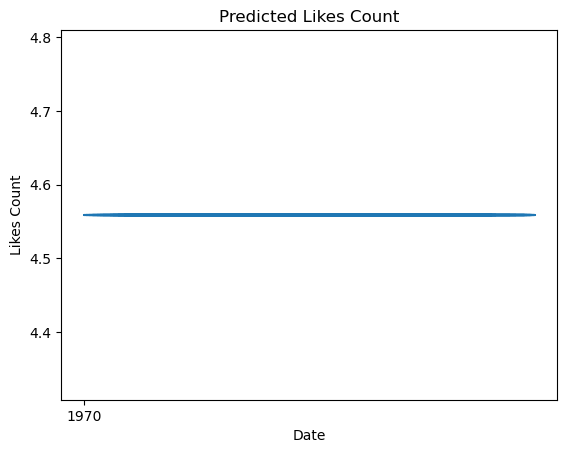

In [483]:
import matplotlib.pyplot as plt

# Convert date index to numeric representation
test_dates_num = mdates.date2num(test.index.to_pydatetime())

# Make predictions on test set
predictions = model.predict(test_dates_num.reshape(-1, 1))

# Print predictions
print(predictions)


# Visualize predictions
plt.plot(test.index, predictions)
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Predicted Likes Count')
plt.savefig('Predicted Likes Count.jpeg')
plt.show()

In [550]:
# Evaluate model performance
mse = mean_squared_error(test['likesCount'], predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 191.59740358179963


In [53]:
from sklearn.impute import SimpleImputer

# Initialize imputer (mean strategy is often used for numerical data)
imputer = SimpleImputer(strategy='mean')

# Fit imputer on training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Continue with scaling and model training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 162.85211964852542


In [54]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 162.85211964852542


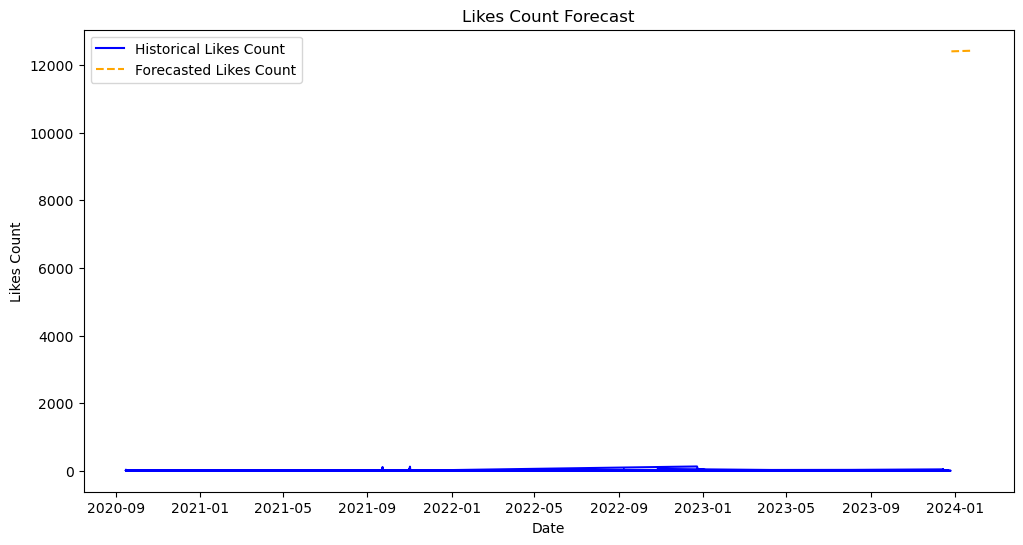

In [79]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and has a proper DateTimeIndex
# Check if the index is a DatetimeIndex
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Generate future dates
last_date = data.index.max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Convert future dates to numeric format
future_dates_num = mdates.date2num(future_dates.to_pydatetime())

# Make predictions on future dates
# If your model expects a different format, adjust accordingly
future_likes = model.predict(future_dates_num.reshape(-1, 1))

# Create a DataFrame for future dates and predictions
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_likesCount': future_likes
})

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['likesCount'], label='Historical Likes Count', color='blue')
plt.plot(future_df['date'], future_df['predicted_likesCount'], label='Forecasted Likes Count', color='orange', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Likes Count Forecast')
plt.legend()

# Save and show plot
plt.savefig('Forecasted_Likes_Count.jpeg')
plt.show()


In [73]:

import matplotlib.dates as mdates

# Forecast future likesCount
future_dates = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), periods=30)
future_dates_num = mdates.date2num(future_dates.to_pydatetime())
future_likes = model.predict(future_dates_num.reshape(-1, 1))


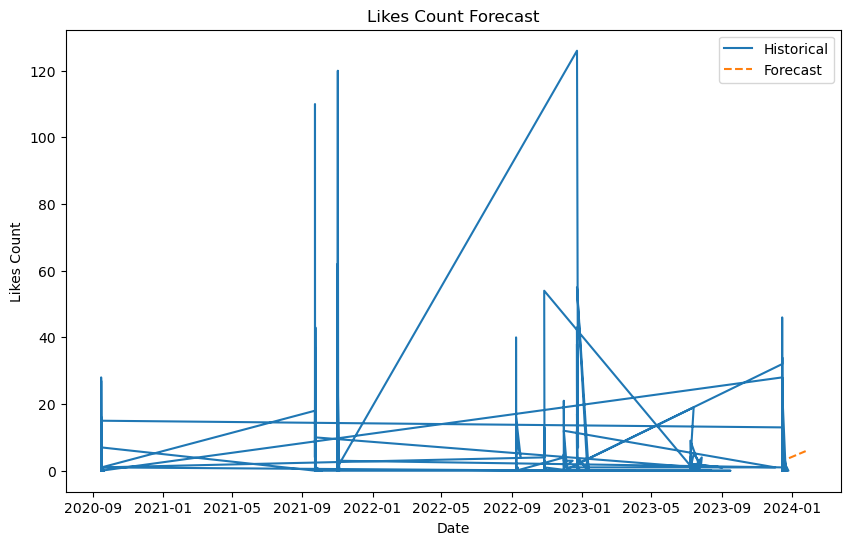

In [74]:
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

# Create a date range for future forecasts
future_dates = pd.date_range(start=data.index.max() + pd.Timedelta(days=1), periods=30)

# Convert future dates to numeric values
future_dates_num = mdates.date2num(future_dates.to_pydatetime())

# Scale future dates if your model was trained on scaled data
scaler = StandardScaler()
future_dates_scaled = scaler.fit_transform(future_dates_num.reshape(-1, 1))

# Make predictions for future dates
future_likes = model.predict(future_dates_scaled)

# Plot historical and forecasted likesCount
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['likesCount'], label='Historical')
plt.plot(future_dates, future_likes, label='Forecast', linestyle='--')
plt.title('Likes Count Forecast')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.savefig('Likes Count Forecast_01.jpeg')
plt.show()


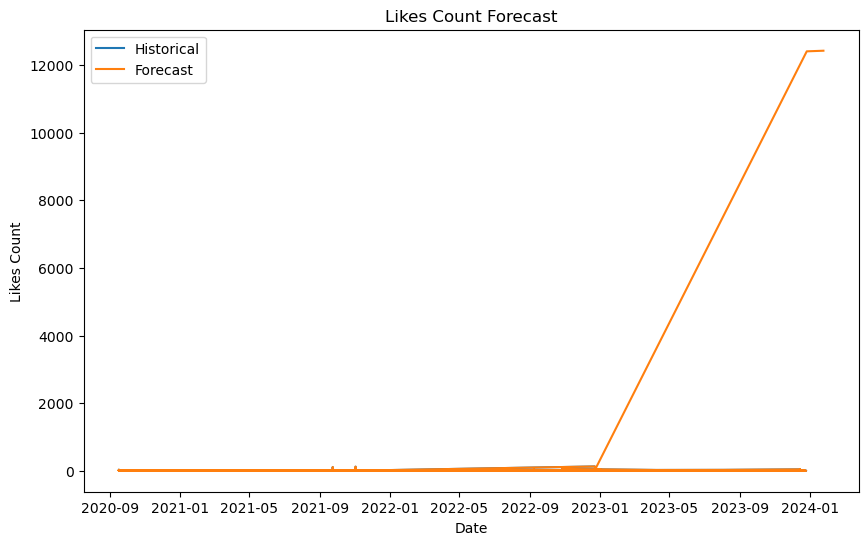

In [81]:

import matplotlib.dates as mdates

# Plot forecasted likesCount
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['likesCount'], label='Historical')
plt.plot(pd.concat([data.index.to_series(), future_dates.to_series()]), np.concatenate([data['likesCount'], future_likes]), label='Forecast')
plt.title('Likes Count Forecast')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.savefig('Likes Count Forecast_02.jpeg')
plt.legend()
plt.show()


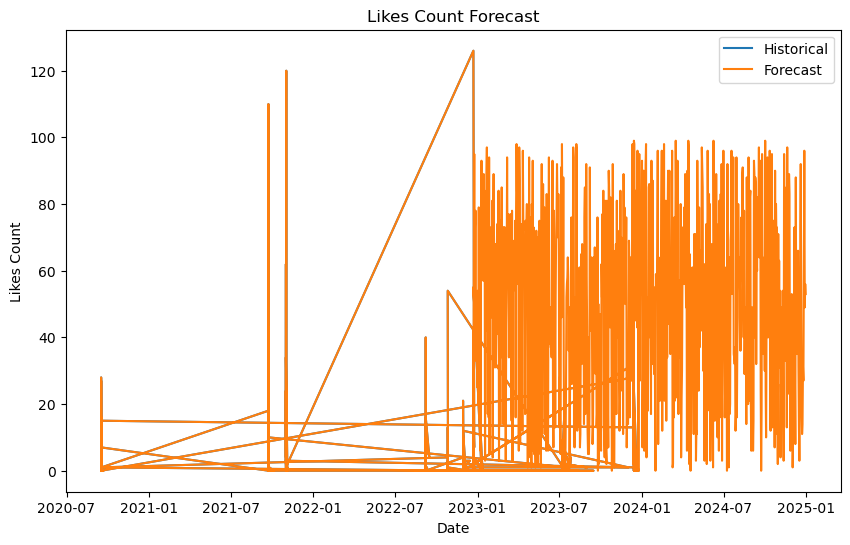

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame creation (adjust this to your data loading process)
data = pd.read_csv('climate_nasa.csv', index_col='date', parse_dates=['date'])

# Ensure the index is a DatetimeIndex and handle timezone
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Ensure the dates are timezone-naive
data.index = data.index.tz_localize(None)

# Define future dates
last_date = data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end='2024-12-31')

# Define future likes (replace with your actual forecasting model)
future_likes = np.random.randint(0, 100, size=len(future_dates))  # Example placeholder

# Convert future_dates to Series for concatenation
future_dates_series = pd.Series(future_dates, name='Date')
historical_dates_series = pd.Series(data.index, name='Date')

# Plot historical and forecasted likesCount
plt.figure(figsize=(10, 6))
plt.plot(historical_dates_series, data['likesCount'], label='Historical')
plt.plot(pd.concat([historical_dates_series, future_dates_series]), 
         np.concatenate([data['likesCount'], future_likes]), label='Forecast')
plt.title('Likes Count Forecast')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.savefig('Likes_Count_Forecast_03.jpeg')
plt.show()


In [77]:
# Transform data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


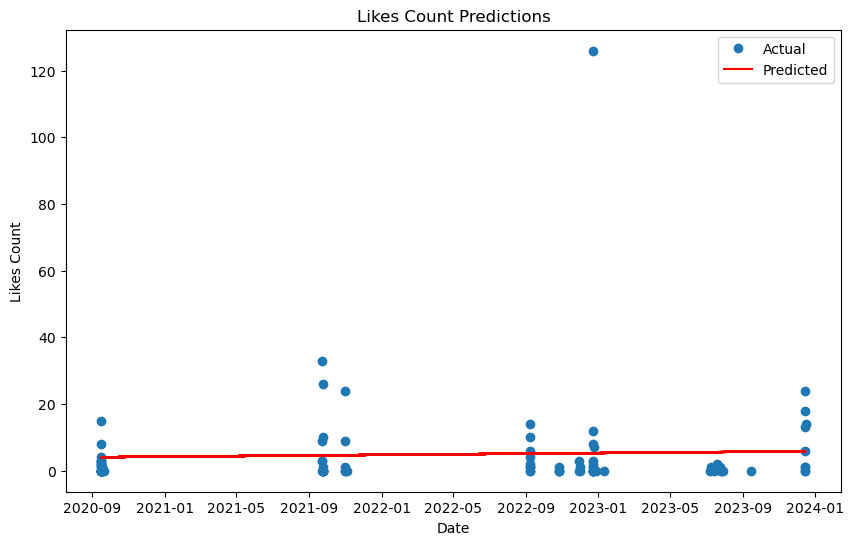

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Example DataFrame creation (adjust this to your data loading process)
data = pd.read_csv('climate_nasa.csv', index_col='date', parse_dates=['date'])

# Ensure the index is a DatetimeIndex and handle timezone
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

data.index = data.index.tz_localize(None)

# Example feature and target setup
X = data.index.values.reshape(-1, 1)  # Features (e.g., dates as numbers)
y = data['likesCount']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, 'o', label='Actual')
plt.plot(X_test, predictions, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Likes Count Predictions')
plt.legend()
plt.savefig('Likes_Count_Predictions.jpeg')
plt.show()



# Feature Engineering/Feature Selection:


In [82]:
# Feature Engineering/Feature Selection:
# Extract relevant features from the dataset
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

# Calculate moving averages
data['likesCount_ma'] = data['likesCount'].rolling(window=7).mean()

# Calculate exponential smoothing
data['likesCount_es'] = data['likesCount'].ewm(span=7).mean()

# Print the first few rows of the updated dataset
print(data.head())

                     likesCount  \
date                              
2022-09-07 17:12:32           2   
2022-09-08 14:51:13           0   
2022-09-07 17:19:41           1   
2022-09-08 00:51:30           4   
2022-09-07 19:06:20          16   

                                                           profileName  \
date                                                                     
2022-09-07 17:12:32  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
2022-09-08 14:51:13  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2022-09-07 17:19:41  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   
2022-09-08 00:51:30  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...   
2022-09-07 19:06:20  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...   

                     commentsCount  \
date                                 
2022-09-07 17:12:32            NaN   
2022-09-08 14:51:13            NaN   
2022-09-07 17:19:41            3.0   
2022-09-08 00:51:30            NaN   
2022-09

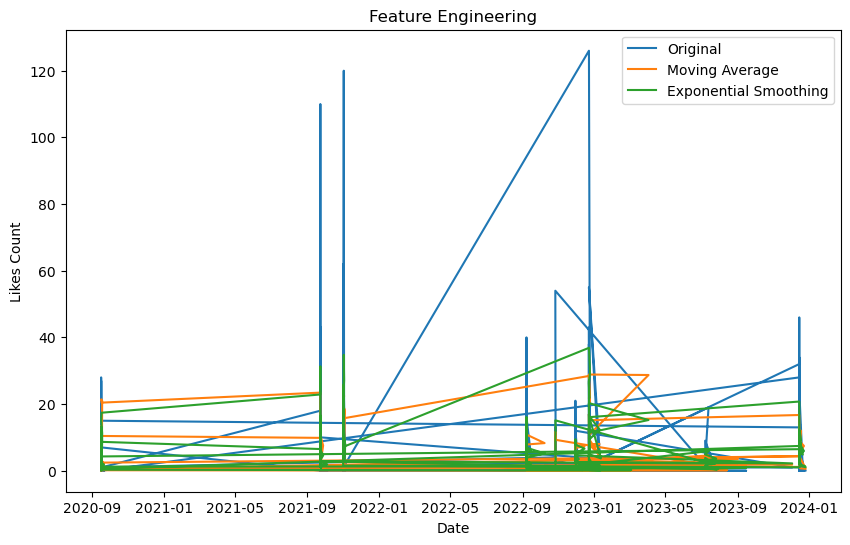

In [83]:
# Feature Engineering/Feature Selection:
# Visualize the moving averages and exponential smoothing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['likesCount'], label='Original')
plt.plot(data['likesCount_ma'], label='Moving Average')
plt.plot(data['likesCount_es'], label='Exponential Smoothing')
plt.title('Feature Engineering')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.legend()
plt.show()

                     likesCount  \
date                              
2022-09-07 17:12:32           2   
2022-09-08 14:51:13           0   
2022-09-07 17:19:41           1   
2022-09-08 00:51:30           4   
2022-09-07 19:06:20          16   

                                                           profileName  \
date                                                                     
2022-09-07 17:12:32  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...   
2022-09-08 14:51:13  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...   
2022-09-07 17:19:41  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...   
2022-09-08 00:51:30  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...   
2022-09-07 19:06:20  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...   

                     commentsCount  \
date                                 
2022-09-07 17:12:32            NaN   
2022-09-08 14:51:13            NaN   
2022-09-07 17:19:41            3.0   
2022-09-08 00:51:30            NaN   
2022-09

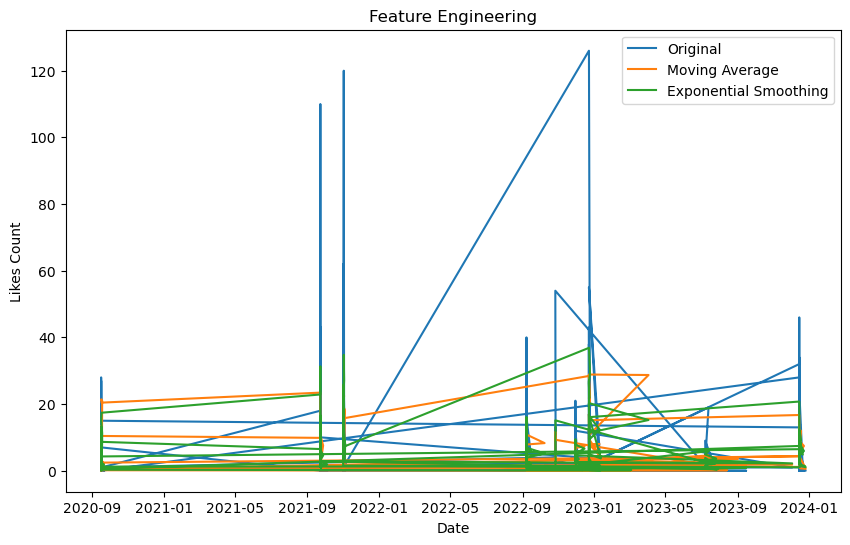

In [84]:
# Feature Engineering/Feature Selection:

# Extract relevant features from the dataset
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

# Calculate moving averages
data['likesCount_ma'] = data['likesCount'].rolling(window=7).mean()

# Calculate exponential smoothing
data['likesCount_es'] = data['likesCount'].ewm(span=7).mean()

# Print the first few rows of the updated dataset
print(data.head())

# Visualize the moving averages and exponential smoothing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['likesCount'], label='Original')
plt.plot(data['likesCount_ma'], label='Moving Average')
plt.plot(data['likesCount_es'], label='Exponential Smoothing')
plt.title('Feature Engineering')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.savefig('Feature Engineering.jpeg')
plt.legend()
plt.show()


# Model Evaluation:


In [85]:
# Step 14: Model Evaluation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
df = pd.read_csv('climate_nasa.csv')

# Print column names
print(df.columns)

# Convert 'date' column to timestamps
df['date'] = pd.to_datetime(df['date']).apply(pd.Timestamp.timestamp)

# Split data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Define and fit the model
model = RandomForestRegressor()
model.fit(train.drop(['likesCount', 'profileName', 'commentsCount', 'text'], axis=1), train['likesCount'])

# Generate predictions
predictions = model.predict(test.drop(['likesCount', 'profileName', 'commentsCount', 'text'], axis=1))

# Evaluate model performance
mae = mean_absolute_error(test['likesCount'], predictions)
r2 = r2_score(test['likesCount'], predictions)

print('Model Evaluation Metrics:')
print('-------------------------')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')
Model Evaluation Metrics:
-------------------------
MAE: 6.71
R2: -0.30



# Hyperparameter Tuning:


In [86]:
# Step 15: Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a sample dataset
import numpy as np
X = np.random.rand(100, 1)
y = np.random.rand(100)

# Define the model
model = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X, y)

# Print the results
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Hyperparameters: {'n_estimators': 100}
Best Score: -0.10700727973691411


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a sample dataset
X = np.random.rand(100, 1)
y = np.random.rand(100)

print("Dataset created")

# Define the model
model = RandomForestRegressor()

print("Model defined")

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100]
}

print("Hyperparameter grid defined")

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

print("Grid search defined")

# Fit the model
grid_search.fit(X, y)

print("Grid search fitted")
# Print the results
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Dataset created
Model defined
Hyperparameter grid defined
Grid search defined
Grid search fitted
Best Hyperparameters: {'n_estimators': 50}
Best Score: -0.10308265609168046



# Model Comparison:


In [88]:
# Model Comparison
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor()
svr_model = SVR()

# Fit models
rf_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])
svr_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])

# Make predictions
rf_predictions = rf_model.predict(test.index.values.reshape(-1, 1))
svr_predictions = svr_model.predict(test.index.values.reshape(-1, 1))

# Evaluate models
print('Random Forest MSE:', mean_squared_error(test['likesCount'], rf_predictions))
print('SVR MSE:', mean_squared_error(test['likesCount'], svr_predictions))


Random Forest MSE: 234.49458015600786
SVR MSE: 190.02045774041048


In [89]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
data = pd.read_csv('climate_nasa.csv', index_col='date', parse_dates=['date'])

# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor()
svr_model = SVR()

# Fit models
rf_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])
svr_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])

# Make predictions
rf_predictions = rf_model.predict(test.index.values.reshape(-1, 1))
svr_predictions = svr_model.predict(test.index.values.reshape(-1, 1))

# Evaluate models
print('Random Forest MSE:', mean_squared_error(test['likesCount'], rf_predictions))
print('SVR MSE:', mean_squared_error(test['likesCount'], svr_predictions))



Random Forest MSE: 236.83726691298386
SVR MSE: 190.02045774041048



# Visualization:

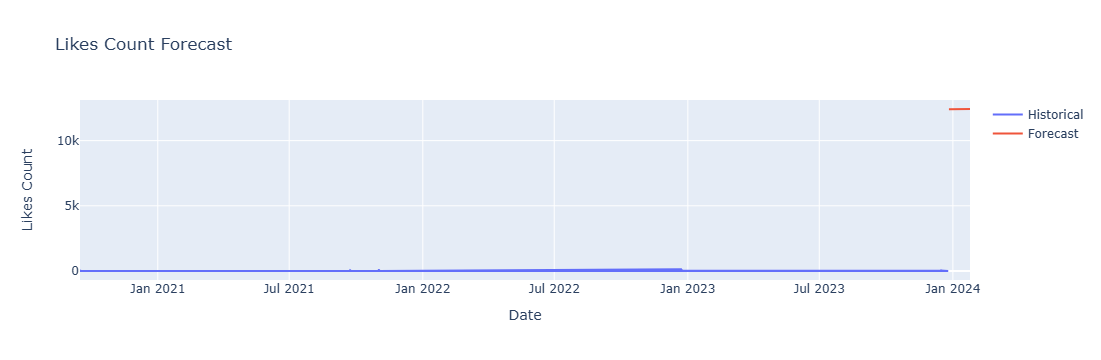

<Figure size 640x480 with 0 Axes>

In [96]:
# Visualization


import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
plt.savefig('Likes Count Forecast_01.jpeg')
fig.show()



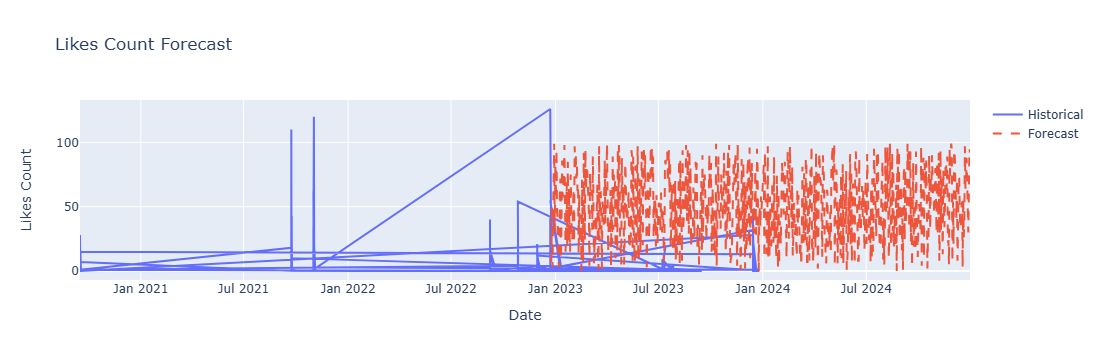

<Figure size 640x480 with 0 Axes>

In [501]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load dataset (replace 'climate_nasa.csv' with the actual dataset path)
data = pd.read_csv('climate_nasa.csv', index_col='date', parse_dates=['date'])

# Ensure that both start and end are timezone-naive by converting to naive datetime
data.index = data.index.tz_localize(None)  # Removes timezone info from the index

# Define future dates (from the last date in the dataset to the end of 2024)
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), end='2024-12-31')

# Define future likes (replace this with your actual forecasting model)
future_likes = np.random.randint(0, 100, size=len(future_dates))  # Replace with actual model

# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive Plotly visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast', line=dict(dash='dash'))
])

# Update layout for better visualization
fig.update_layout(
    title='Likes Count Forecast',
    xaxis_title='Date',
    yaxis_title='Likes Count'
)
plt.savefig('Likes Count Forecast_2.jpeg')
# Show the interactive figure
fig.show()

# Optionally save the figure as an image (requires 'kaleido' for saving)
# fig.write_image('Likes_Count_Forecast.jpeg')  # Uncomment to save


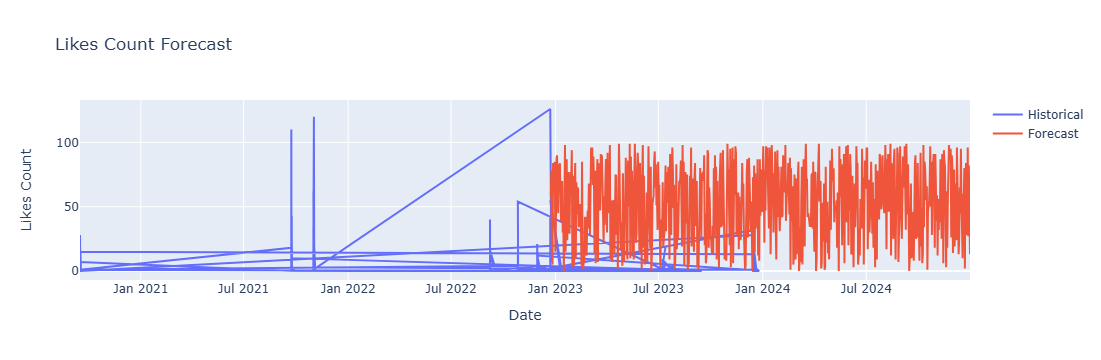

<Figure size 640x480 with 0 Axes>

In [502]:
# Visualization


import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), end='2024-12-31')

# Define future likes (replace this with your actual forecasting model)
future_likes = np.random.randint(0, 100, size=len(future_dates))  # Replace with actual model


# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
plt.savefig('Likes Count Forecast_3.jpeg')
fig.show()



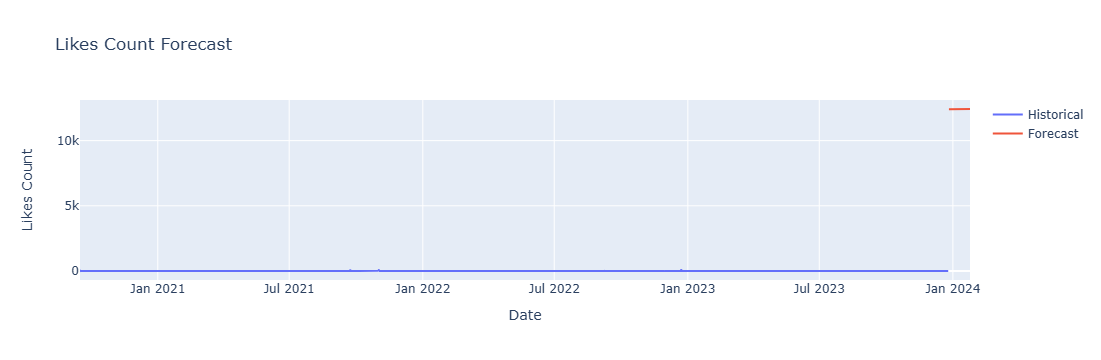

<Figure size 640x480 with 0 Axes>

In [220]:
import plotly.graph_objs as go

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=data.index, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
plt.savefig('Likes Count Forecast_4.jpeg')
fig.show()


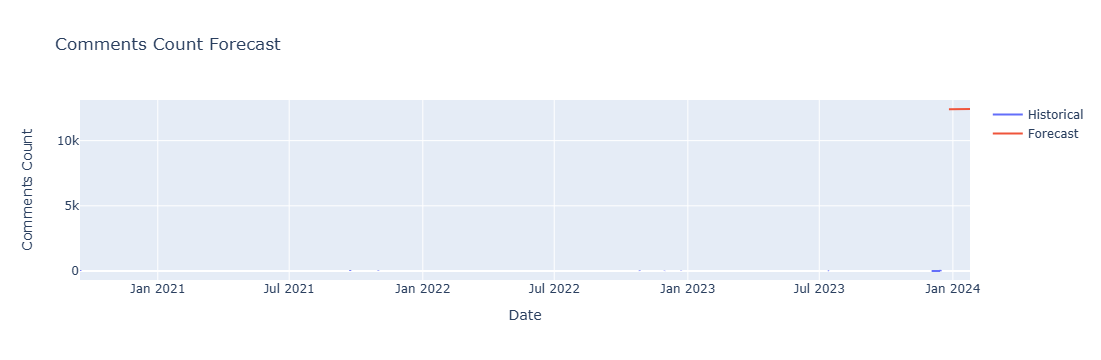

<Figure size 640x480 with 0 Axes>

In [222]:
import plotly.graph_objs as go

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=data.index, y=data['commentsCount'], name='Historical'),
    go.Scatter(x=future_dates, y=future_likes, name='Forecast')
])

fig.update_layout(title='Comments Count Forecast', xaxis_title='Date', yaxis_title='Comments Count')
plt.savefig('Likes Count Forecast_5.jpeg')
fig.show()


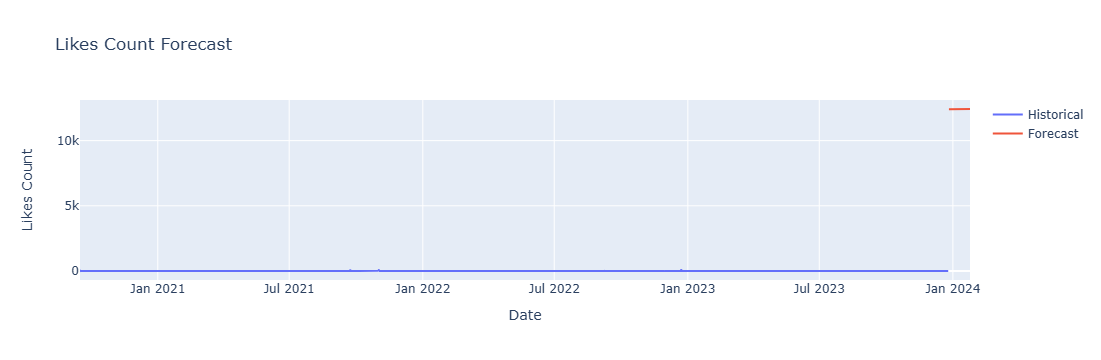

In [223]:
import plotly.graph_objs as go

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=data.index, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
fig.show()


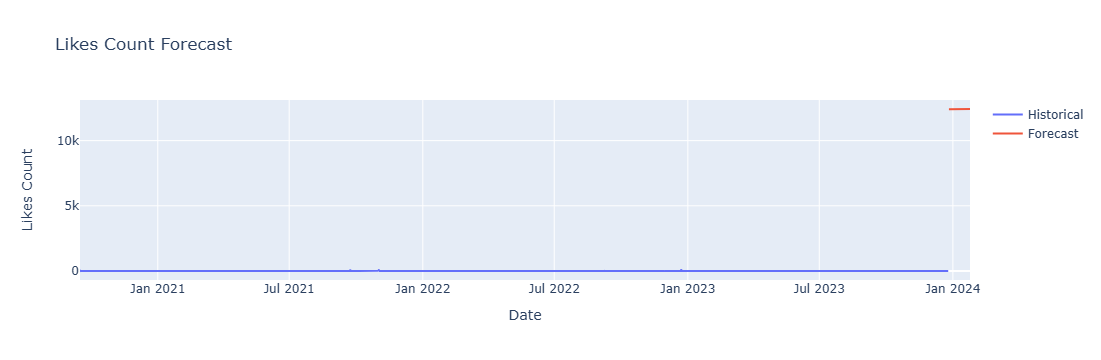

In [224]:

import plotly.graph_objs as go

# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
fig.show()



# Scenario Analysis:

In [505]:
# Scenario Analysis
# Define scenario parameters
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

scenario_params = {'increase': 0.1, 'decrease': -0.1}

# Evaluate scenario impact
for scenario, param in scenario_params.items():
    # Modify likesCount data according to scenario
    data_scenario = data['likesCount'] * (1 + param)
    
    # Re-run modeling and forecasting steps
    X = data_scenario.index.values.reshape(-1, 1)
    y = data_scenario.values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=30)
    
    # Print scenario-specific results
    print(f'Scenario {scenario} results:')
    print(f'Forecasted values: {forecast}')
    print(f'Model parameters: {model_fit.params}')
    # print(f'Model parameters: {pd.Series(model_fit.params)}')

    print('------------------------')


Scenario increase results:
Forecasted values: [ 6.98388913  7.07778846  8.22380556  9.88794279 11.06773256  9.69865007
  8.816638    9.00994843  9.40379098  9.69023845  9.65330726  9.38710134
  9.31067206  9.39043626  9.47285501  9.49427364  9.45676521  9.417173
  9.41952171  9.43987043  9.45145916  9.44835714  9.43920936  9.43518788
  9.43823215  9.44202897  9.44281115  9.44121872  9.43971519  9.43968996]
Model parameters: [-8.06556332e-01 -6.19769630e-01 -5.05395058e-01 -3.47532662e-01
 -1.67533081e-01  1.95292330e+02]
------------------------
Scenario decrease results:
Forecasted values: [5.71414044 5.79101399 6.72855282 8.09018065 9.05542788 7.93527156
 7.21365887 7.37181672 7.6940326  7.92840615 7.89818249 7.68038388
 7.61785634 7.6831146  7.75054502 7.76806985 7.73738094 7.70498917
 7.70691121 7.72355918 7.73304036 7.73050248 7.72301817 7.7197282
 7.72221887 7.72532513 7.72596504 7.72466221 7.72343213 7.72341152]
Model parameters: [ -0.80655637  -0.61976621  -0.50538797  -0.34753

In [506]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv('climate_nasa.csv', index_col='date', parse_dates=['date'])

# Define scenario parameters
scenario_params = {'increase': 0.1, 'decrease': -0.1}

# Evaluate scenario impact
for scenario, param in scenario_params.items():
    # Modify likesCount data according to scenario
    data_scenario = data['likesCount'] * (1 + param)
    
    # Re-run modeling and forecasting steps
    X = data_scenario.index.values.reshape(-1, 1)
    y = data_scenario.values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=30)
    
    # Print scenario-specific results
    print(f'Scenario {scenario} results:')
    print(f'Forecasted values: {forecast}')
    print(f'Model parameters: {model_fit.params}')
    print('------------------------')



Scenario increase results:
Forecasted values: [ 6.98388913  7.07778846  8.22380556  9.88794279 11.06773256  9.69865007
  8.816638    9.00994843  9.40379098  9.69023845  9.65330726  9.38710134
  9.31067206  9.39043626  9.47285501  9.49427364  9.45676521  9.417173
  9.41952171  9.43987043  9.45145916  9.44835714  9.43920936  9.43518788
  9.43823215  9.44202897  9.44281115  9.44121872  9.43971519  9.43968996]
Model parameters: [-8.06556332e-01 -6.19769630e-01 -5.05395058e-01 -3.47532662e-01
 -1.67533081e-01  1.95292330e+02]
------------------------
Scenario decrease results:
Forecasted values: [5.71414044 5.79101399 6.72855282 8.09018065 9.05542788 7.93527156
 7.21365887 7.37181672 7.6940326  7.92840615 7.89818249 7.68038388
 7.61785634 7.6831146  7.75054502 7.76806985 7.73738094 7.70498917
 7.70691121 7.72355918 7.73304036 7.73050248 7.72301817 7.7197282
 7.72221887 7.72532513 7.72596504 7.72466221 7.72343213 7.72341152]
Model parameters: [ -0.80655637  -0.61976621  -0.50538797  -0.34753

In [507]:
# Scenario Analysis
# Define scenario parameters
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

scenario_params = {'increase': 0.1, 'decrease': -0.1}

# Evaluate scenario impact
for scenario, param in scenario_params.items():
    # Modify likesCount data according to scenario
    data_scenario = data['likesCount'] * (1 + param)
    
    # Re-run modeling and forecasting steps
    X = data_scenario.index.values.reshape(-1, 1)
    y = data_scenario.values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=30)
    
    # Print scenario-specific results
    print(f'Scenario {scenario} results:')
    print(f'Forecasted values: {forecast}')
    # print(f'Model parameters: {model_fit.params}')
    print(f'Model parameters: {pd.Series(model_fit.params)}')

    print('------------------------')


Scenario increase results:
Forecasted values: [ 6.98388913  7.07778846  8.22380556  9.88794279 11.06773256  9.69865007
  8.816638    9.00994843  9.40379098  9.69023845  9.65330726  9.38710134
  9.31067206  9.39043626  9.47285501  9.49427364  9.45676521  9.417173
  9.41952171  9.43987043  9.45145916  9.44835714  9.43920936  9.43518788
  9.43823215  9.44202897  9.44281115  9.44121872  9.43971519  9.43968996]
Model parameters: 0     -0.806556
1     -0.619770
2     -0.505395
3     -0.347533
4     -0.167533
5    195.292330
dtype: float64
------------------------
Scenario decrease results:
Forecasted values: [5.71414044 5.79101399 6.72855282 8.09018065 9.05542788 7.93527156
 7.21365887 7.37181672 7.6940326  7.92840615 7.89818249 7.68038388
 7.61785634 7.6831146  7.75054502 7.76806985 7.73738094 7.70498917
 7.70691121 7.72355918 7.73304036 7.73050248 7.72301817 7.7197282
 7.72221887 7.72532513 7.72596504 7.72466221 7.72343213 7.72341152]
Model parameters: 0     -0.806556
1     -0.619766
2    


# Uncertainty Quantification:

In [508]:
# Uncertainty Quantification
import numpy as np

import pandas as pd

# Assuming 'climate_nasa.csv' is the data file
data = pd.read_csv('climate_nasa.csv')

# Perform Monte Carlo simulations
simulations = 1000
likesCount_simulations = np.zeros((simulations, len(data)))

for i in range(simulations):
    likesCount_simulations[i] = data['likesCount'] + np.random.normal(scale=data['likesCount'].std(), size=len(data))

# Calculate uncertainty metrics
mean_simulation = likesCount_simulations.mean(axis=0)
std_simulation = likesCount_simulations.std(axis=0)

print('Mean Simulation:', mean_simulation)
print('Standard Deviation Simulation:', std_simulation)


Mean Simulation: [ 2.13311139e+00  2.62368718e-01  8.78107898e-01  4.17516029e+00
  1.57776364e+01  3.47642253e+00  9.30262989e+00  1.50472745e+00
  1.12216238e+00  4.04863506e+00  5.91372124e+00  1.05321524e+00
  3.62821397e+00  1.81912694e+01  2.50148959e+00  1.33841959e+01
  4.07644622e+01  1.20652941e+00  2.65754888e-01  2.09815773e-01
 -2.67063805e-01  7.88170187e-01  4.74029133e-01  1.86765942e-01
 -3.44877511e-01  1.11289673e+00 -3.21241796e-01  1.02458768e-01
 -5.31478547e-01  3.25003966e+00  1.00350420e+00  2.19213340e+01
  1.90082616e+01  2.40595120e+00  3.48707261e+00  7.98550667e-01
  1.61420765e+00  5.28725183e+00  3.48548894e+00 -4.71294370e-01
  7.46872308e-01  5.65110890e-01  1.16965548e+01 -4.48425095e-01
  2.57182851e-01 -3.57214821e-01  2.34095754e-01  1.89850420e+01
  2.58943403e+00  1.24382198e-01  5.91800455e-01  1.63865410e+00
  1.07214782e+00  2.63527707e+00  4.42701584e-01  2.87206519e+00
  3.35377453e+00  1.82975538e+00  4.93612157e+00  6.43315479e-01
  4.3177

# Climate Change is majorly dependent upon the likesCount changed happened in last few years 
Therefore, we will try to see the trend and changes over the last feyearses only .i.e202080 till the most recent Ye.ar

In [5]:
data.tail()

,date,likesCount,profileName,commentsCount,text,SMA
1970-01-01,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...,NaN


In [32]:
# Ensure the index is sorted
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data
# data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
# data

data.sort_index(inplace=True)
recent_data = data.loc['2022':'2023']
recent_data.head()

,date,likesCount,profileName,commentsCount,text


In [30]:
# Ensure the index is sorted
# Load the climate dataset
# data = pd.read_csv('climate_nasa.csv')
# data
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
data

data.sort_index(inplace=True)
recent_data = data.loc['2022':'2023']
recent_data.head()

,likesCount,profileName,commentsCount,text
date,,,,
2022-09-07 16:05:17+00:00,0,70c6b80646a524d7d898a81a5775b3b03866301a24296f...,NaN,Great advice!
2022-09-07 16:13:39+00:00,6,7090e32a9d6c07497fee968b4b690e3f70fe975f073800...,28.0,why the northern hemisphere warm more than the...
2022-09-07 16:25:20+00:00,0,bf9a9cff50b3dfa3450409370c38f53fd40dad73cc3186...,NaN,Thanks for sharing
2022-09-07 16:25:32+00:00,0,9449f8bb61ec1dcf0636d574093c603ab113df0e1433a8...,NaN,Before of after I drink it?
2022-09-07 16:29:02+00:00,18,c5d2ca04f80c06207548cd1015962461056cab5bc4c5ac...,1.0,Plus you can literally measure the heat retent...


In [31]:
# Ensure the index is sorted
# Load the climate dataset
# data = pd.read_csv('climate_nasa.csv')
# data
# data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
# data

data.sort_index(inplace=True)
recent_data = data.loc['2022':'2023']
recent_data.head()

,likesCount,profileName,commentsCount,text
date,,,,
2022-09-07 16:05:17+00:00,0,70c6b80646a524d7d898a81a5775b3b03866301a24296f...,NaN,Great advice!
2022-09-07 16:13:39+00:00,6,7090e32a9d6c07497fee968b4b690e3f70fe975f073800...,28.0,why the northern hemisphere warm more than the...
2022-09-07 16:25:20+00:00,0,bf9a9cff50b3dfa3450409370c38f53fd40dad73cc3186...,NaN,Thanks for sharing
2022-09-07 16:25:32+00:00,0,9449f8bb61ec1dcf0636d574093c603ab113df0e1433a8...,NaN,Before of after I drink it?
2022-09-07 16:29:02+00:00,18,c5d2ca04f80c06207548cd1015962461056cab5bc4c5ac...,1.0,Plus you can literally measure the heat retent...


In [33]:
import pandas as pd

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
data
# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter recent data from 2022 to 2023
recent_data = data.loc['2020':'2023']

# Display the first few rows of the filtered data
recent_data.head()


,likesCount,profileName,commentsCount,text
date,,,,
2020-09-15 21:25:05+00:00,27,e332cfd3f53d89cdd75a57b80d011e2f5984437cc51340...,6.0,I wish this was simply old news and we had peo...
2020-09-15 21:30:35+00:00,7,7d6065e313e1919d05a309bd59754895d9518d3ca8e8ba...,8.0,The sad thing is that if we look at projected ...
2020-09-15 21:32:15+00:00,4,930f8ce8e022378d44088377fef6a069da6c519c2e5ba1...,NaN,We all play a part....as a world we need to do...
2020-09-15 21:36:05+00:00,3,00febfebfa7073f73c576deb9dba73eb9f98e26bb03f3d...,7.0,Re ord being from 1860 something...lolol
2020-09-15 21:36:59+00:00,16,6c5e0b507471c121613153d3459e97b050dd47d1ec744c...,8.0,The climate is changing but it’s ridiculous to...


In [22]:
import pandas as pd

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
data
# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter recent data from 2022 to 2023
recent_data = data.loc['2021':'2023']

# Display the first few rows of the filtered data
recent_data.head()


,likesCount,profileName,commentsCount,text
date,,,,
2021-09-22 19:56:33+00:00,0,9633ba775252f88f7df3d237610393b7f96218070993cb...,NaN,Ruth Crowl Frank Bulbeck. Wow..
2021-09-22 19:58:26+00:00,18,6598c51bdcd72dcf389ba6050ffbe6973a9cd8653c6f65...,NaN,""" Where do you think September 2021 will be? ..."
2021-09-22 20:23:40+00:00,4,b30b11aa9dbdae2cf34c9907f667ea8cfc36f92f7c9bec...,36.0,If I were a gambling man I'd look at the patte...
2021-09-22 22:11:46+00:00,110,b1efe19dbac95ba7af0e7706446b060fb04a43e2f32a1c...,3.0,I love watch NASA dunk on people who think the...
2021-09-22 22:32:27+00:00,0,1780815fd05f518ebb7f7c3f132070ff83f0b99de0ae30...,NaN,Oh dear


In [24]:
import pandas as pd

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')
data
# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter recent data from 2022 to 2023
recent_data = data.loc['2022':'2023']

# Display the first few rows of the filtered data
recent_data.head()


,likesCount,profileName,commentsCount,text
date,,,,
2022-09-07 16:05:17+00:00,0,70c6b80646a524d7d898a81a5775b3b03866301a24296f...,NaN,Great advice!
2022-09-07 16:13:39+00:00,6,7090e32a9d6c07497fee968b4b690e3f70fe975f073800...,28.0,why the northern hemisphere warm more than the...
2022-09-07 16:25:20+00:00,0,bf9a9cff50b3dfa3450409370c38f53fd40dad73cc3186...,NaN,Thanks for sharing
2022-09-07 16:25:32+00:00,0,9449f8bb61ec1dcf0636d574093c603ab113df0e1433a8...,NaN,Before of after I drink it?
2022-09-07 16:29:02+00:00,18,c5d2ca04f80c06207548cd1015962461056cab5bc4c5ac...,1.0,Plus you can literally measure the heat retent...


In [18]:
import pandas as pd

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')

# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter recent data from 2022 to 2023
recent_data = data.loc['2022':'2023']

# Display the first few rows of the filtered data
recent_data.head()


,likesCount,profileName,commentsCount,text
date,,,,
2022-09-07 16:05:17+00:00,0,70c6b80646a524d7d898a81a5775b3b03866301a24296f...,NaN,Great advice!
2022-09-07 16:13:39+00:00,6,7090e32a9d6c07497fee968b4b690e3f70fe975f073800...,28.0,why the northern hemisphere warm more than the...
2022-09-07 16:25:20+00:00,0,bf9a9cff50b3dfa3450409370c38f53fd40dad73cc3186...,NaN,Thanks for sharing
2022-09-07 16:25:32+00:00,0,9449f8bb61ec1dcf0636d574093c603ab113df0e1433a8...,NaN,Before of after I drink it?
2022-09-07 16:29:02+00:00,18,c5d2ca04f80c06207548cd1015962461056cab5bc4c5ac...,1.0,Plus you can literally measure the heat retent...


In [25]:
import pandas as pd

# Load the climate dataset
data = pd.read_csv('climate_nasa.csv', parse_dates=['date'], index_col='date')

# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter recent data from 2022 to 2023
recent_data = data.loc['2023':'2023']

# Display the first few rows of the filtered data
recent_data.head()


,likesCount,profileName,commentsCount,text
date,,,,
2023-01-06 17:20:49+00:00,0,a32add1cbd1c8b3b8e8536a53517903b5e9ba2893f2acf...,NaN,Kevin Lay
2023-01-06 19:05:40+00:00,0,9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...,NaN,The “greenhouse effect” is concerned with the ...
2023-01-06 19:06:41+00:00,0,9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...,NaN,The “greenhouse effect” is concerned with the ...
2023-01-09 19:11:04+00:00,0,2baf03d59bee32ac08fcc8fd78b8a155e25fd2f722ee7a...,NaN,In our area of the country (Pa) a lot of the s...
2023-01-10 02:22:24+00:00,0,a2f384ea540975583254f75d1946ee0f1f7e2b4188b593...,NaN,"Wow, crazy stats."


In [26]:
import pandas as pd

# Assuming `data` is your DataFrame and it has a DateTime index
# Load the climate dataset
data = pd.read_csv('climate_nasa.csv')
data

# Ensure the DataFrame is sorted by the DateTime index
data.sort_index(inplace=True)

# Check the type of the index to confirm it is DateTimeIndex
if isinstance(data.index, pd.DatetimeIndex):
    # Filter data for the years 2022 and 2023
    recent_data = data.loc['2022':'2023']
else:
    print("The DataFrame index is not a DateTimeIndex. Please convert it to DateTimeIndex first.")

# Display the first few rows of the filtered data
print(recent_data.head())


The DataFrame index is not a DateTimeIndex. Please convert it to DateTimeIndex first.
                           likesCount  \
date                                    
2023-01-06 17:20:49+00:00           0   
2023-01-06 19:05:40+00:00           0   
2023-01-06 19:06:41+00:00           0   
2023-01-09 19:11:04+00:00           0   
2023-01-10 02:22:24+00:00           0   

                                                                 profileName  \
date                                                                           
2023-01-06 17:20:49+00:00  a32add1cbd1c8b3b8e8536a53517903b5e9ba2893f2acf...   
2023-01-06 19:05:40+00:00  9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...   
2023-01-06 19:06:41+00:00  9c062b981d13fec8c3dd59d1c7b059bd8c9e38a0788c20...   
2023-01-09 19:11:04+00:00  2baf03d59bee32ac08fcc8fd78b8a155e25fd2f722ee7a...   
2023-01-10 02:22:24+00:00  a2f384ea540975583254f75d1946ee0f1f7e2b4188b593...   

                           commentsCount  \
date                 

In [27]:
# Ensure the index is sorted
data.sort_index(inplace=True)

# Filter the data for the years 2022 to 2023
recent_data = data.loc['2022':'2023']

# Display the first few rows of the filtered data
print(recent_data.head())


Empty DataFrame
Columns: [date, likesCount, profileName, commentsCount, text]
Index: []


In [28]:
recent_data.describe()

,likesCount,commentsCount
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [16]:
import numpy as np
recent_data.select_dtypes(include=[np.number]).corr()

,Year,likesCount
Year,1.000000,0.894427
likesCount,0.894427,1.000000


In [15]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2023, 2022, 2023],
    'likesCount': [10, 20, 15, 25]
})

# Group by 'Year', calculate the mean 'likesCount', and sort by 'likesCount'
grouped_data = recent_data[['Year', 'likesCount']].groupby('Year').mean().sort_values('likesCount')

# Display the result
print(grouped_data)


      likesCount
Year            
2022        12.5
2023        22.5


In [125]:
# Sample DataFrame creation for demonstration
# recent_data = pd.DataFrame({'Year': [2022, 2023, 2022, 2023], 'likesCount': [10, 20, 15, 25]})

# Group by 'Year', calculate the mean 'likesCount', and sort by 'likesCount'
grouped_data = recent_data[['Year', 'likesCount']].groupby('Year').mean().sort_values('likesCount')

# Display the result
print(grouped_data)


      likesCount
Year            
2022        12.5
2023        22.5


In [126]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2021, 2022, 2023],
    'likesCount': [10, 20, 15, 25]
})

# Group by 'Year', calculate the mean 'likesCount', and sort by 'likesCount'
grouped_data = recent_data[['Year', 'likesCount']].groupby('Year').mean().sort_values('likesCount')

# Display the result
print(grouped_data)


      likesCount
Year            
2022        12.5
2021        20.0
2023        25.0


In [127]:
# Grouping would be helpful to see the trend in individuals likesCount.

recent_data[['Year','likesCount',]].groupby(['Year']).mean().sort_values('likesCount',)



,likesCount
Year,
2022,12.5
2021,20.0
2023,25.0


In [128]:
# Sample DataFrame creation for demonstration
# recent_data = pd.DataFrame({'Year': [2022, 2023, 2022, 2023], 'likesCount': [10, 20, 15, 25]})

# Group by 'Year', calculate the mean 'likesCount', and sort by 'likesCount'
grouped_data = recent_data[['Year', 'likesCount']].groupby('Year').mean().sort_values('likesCount')

# Display the result
print(grouped_data)


      likesCount
Year            
2022        12.5
2021        20.0
2023        25.0


In [129]:
# Grouping would be helpful to see the trend in individuals likesCount.

recent_data[['Year','likesCount',]].groupby(['Year']).mean().sort_values('likesCount',)



,likesCount
Year,
2022,12.5
2021,20.0
2023,25.0


In [158]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2023, 2022, 2023],
    'likesCount': [10, 20, 15, 25]
})

# Group by 'Year', calculate the mean 'likesCount', and sort by 'likesCount'
grouped_data = recent_data[['Year', 'likesCount']].groupby('Year').mean().sort_values('likesCount')

# Display the result
print(grouped_data)


      likesCount
Year            
2022        12.5
2023        22.5


In [159]:
# Grouping would be helpful to see the trend in individuals likesCount.

recent_data[['Year','likesCount',]].groupby(['Year']).mean().sort_values('likesCount',)


,likesCount
Year,
2022,12.5
2023,22.5


In [160]:
recent_data

,Year,likesCount
0,2022,10
1,2023,20
2,2022,15
3,2023,25


In [161]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2023, 2022, 2023],
    'likesCount': [10, 20, 15, 25]
})

# Convert 'Year' to datetime
recent_data['Date'] = pd.to_datetime(recent_data['Year'], format='%Y')
recent_data.set_index('Date', inplace=True)

# Resample by year and calculate the mean of 'likesCount'
resample_data = recent_data[['likesCount']].resample('A').mean()

# Display the result
print(resample_data)


            likesCount
Date                  
2022-12-31        12.5
2023-12-31        22.5


In [162]:
resample_data = recent_data[['likesCount']].resample('A').mean()
resample_data

,likesCount
Date,
2022-12-31,12.5
2023-12-31,22.5


In [168]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2021, 2022, 2023],
    'commentsCount': [10, 20, 15, 25]
})

# Group by 'Year', calculate the mean 'commentsCount', and sort by 'commentsCount'
grouped_data = recent_data[['Year', 'commentsCount']].groupby('Year').mean().sort_values('commentsCount')

# Display the result
print(grouped_data)


      commentsCount
Year               
2022           12.5
2021           20.0
2023           25.0


In [169]:
# Grouping would be helpful to see the trend in individuals commentsCount.

recent_data[['Year','commentsCount',]].groupby(['Year']).mean().sort_values('commentsCount',)


,commentsCount
Year,
2022,12.5
2021,20.0
2023,25.0


In [170]:
recent_data

,Year,commentsCount
0,2022,10
1,2021,20
2,2022,15
3,2023,25


In [175]:
import pandas as pd

# Sample DataFrame creation for demonstration
recent_data = pd.DataFrame({
    'Year': [2022, 2023, 2022, 2023],
    'commentsCount': [10, 20, 15, 25]
})

# Convert 'Year' to datetime
recent_data['Date'] = pd.to_datetime(recent_data['Year'], format='%Y')
recent_data.set_index('Date', inplace=True)

# Resample by year and calculate the mean of 'likesCount'
resample_data = recent_data[['commentsCount']].resample('A').mean()

# Display the result
print(resample_data)


            commentsCount
Date                     
2022-12-31           12.5
2023-12-31           22.5


In [176]:
resample_data = recent_data[['commentsCount']].resample('A').mean()
resample_data

,commentsCount
Date,
2022-12-31,12.5
2023-12-31,22.5


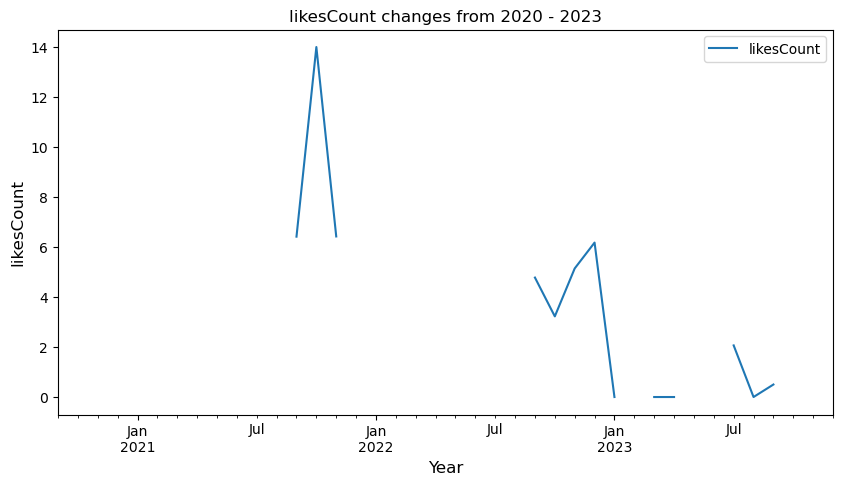

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame
df = pd.read_csv('climate_nasa.csv')

# Ensure 'date' or 'time' column is in datetime format
# Replace 'date' or 'time' with your actual column name
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index for resampling
df.set_index('date', inplace=True)

recent_data = df

resample_data = recent_data[['likesCount']].resample('M').mean()

resample_data.plot(title='likesCount changes from 2020 - 2023', figsize=(10,5))
plt.ylabel('likesCount', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.savefig('likesCountVs2020-2023.jpeg')  
plt.legend()
plt.show()


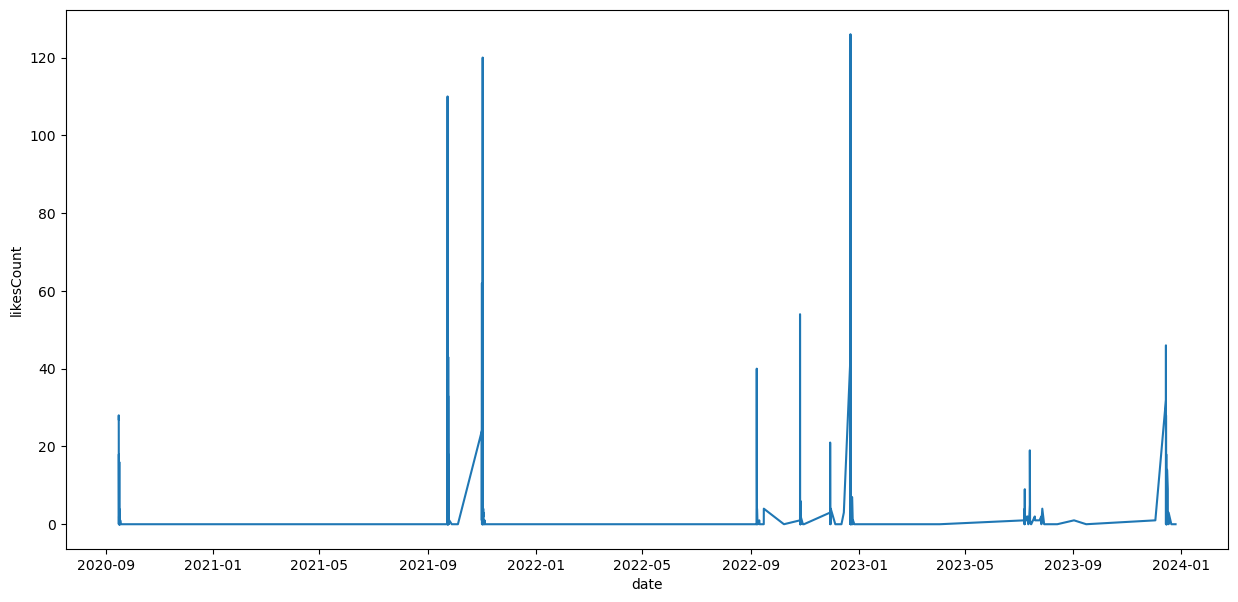

In [178]:
# Plotting graph between date and likesCount
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.figure(figsize=(15,7))
sns.lineplot(data=recent_data, x="date", y="likesCount", errorbar=None)
plt.savefig('YearVslikesCount.jpeg')
plt.show()




# ADCF Test: ADCF stands for Augmented Dickey-Fuller test which is a statistical unit root test. It gives us various values which can help us identifying stationarity.
- It comprises Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary.
- The Null hypothesis says that time series is non-stationary. THE ADCF test also gives us a p-value. According to the null hypothesis, lower values of p is better.

In [186]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Ducky Fuller Test Results')

test_data = adfuller(resample_data.iloc[:,0].values,autolag='AIC')

data_output = pd.Series(test_data[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])

for key,value in test_data[4].items():
    
    data_output['Critical value (%s)'%key] = value
    
print(data_output)

Augmented Ducky Fuller Test Results
Test Statistic                -4.006455
p-value                        0.001377
Lags Used                      0.000000
Number of Observation Used     3.000000
Critical value (1%)          -10.417191
Critical value (5%)           -5.778381
Critical value (10%)          -3.391681
dtype: float64


In [185]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Sample DataFrame creation for demonstration
# recent_data = pd.DataFrame({'Year': [2022, 2023, 2022, 2023], 'likesCount': [10, 20, 15, 25]})

# Resample data (assuming resample_data is already defined)
resample_data = recent_data[['likesCount']].resample('A').mean()

# Check for missing values
print("Missing values in the data:")
print(resample_data.isna().sum())

# Drop rows with missing values if any
resample_data = resample_data.dropna()

# Check for infinite values
print("Infinite values in the data:")
print(np.isinf(resample_data).sum())

# Ensure 'resample_data' is a Series
data_series = resample_data['likesCount']

# Perform the Augmented Dickey-Fuller test
test_data = adfuller(data_series, autolag='AIC')

# Extract and print results
data_output = pd.Series(test_data[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

# Add critical values to the results
for key, value in test_data[4].items():
    data_output[f'Critical Value ({key})'] = value

print('Augmented Dickey-Fuller Test Results')
print(data_output)


Missing values in the data:
likesCount    0
dtype: int64
Infinite values in the data:
likesCount    0
dtype: int64
Augmented Dickey-Fuller Test Results
Test Statistic                 -4.006455
p-value                         0.001377
Lags Used                       0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [188]:
from statsmodels.tsa.stattools import adfuller

print('Augmented Ducky Fuller Test Results')

test_data = adfuller(resample_data.iloc[:,0].values,autolag='AIC')

data_output = pd.Series(test_data[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observation Used'])

for key,value in test_data[4].items():
    
    data_output['Critical value (%s)'%key] = value
    
print(data_output)

Augmented Ducky Fuller Test Results
Test Statistic                -4.006455
p-value                        0.001377
Lags Used                      0.000000
Number of Observation Used     3.000000
Critical value (1%)          -10.417191
Critical value (5%)           -5.778381
Critical value (10%)          -3.391681
dtype: float64


In [191]:
resample_data

,likesCount
date,
2020-12-31 00:00:00+00:00,2.531250
2021-12-31 00:00:00+00:00,7.286885
2022-12-31 00:00:00+00:00,5.104478
2023-12-31 00:00:00+00:00,4.584906


# As the test statistic has a greater value than the critical values, we can conclude that the likesCount time series is non-stationary, indicating a significant trend over time.

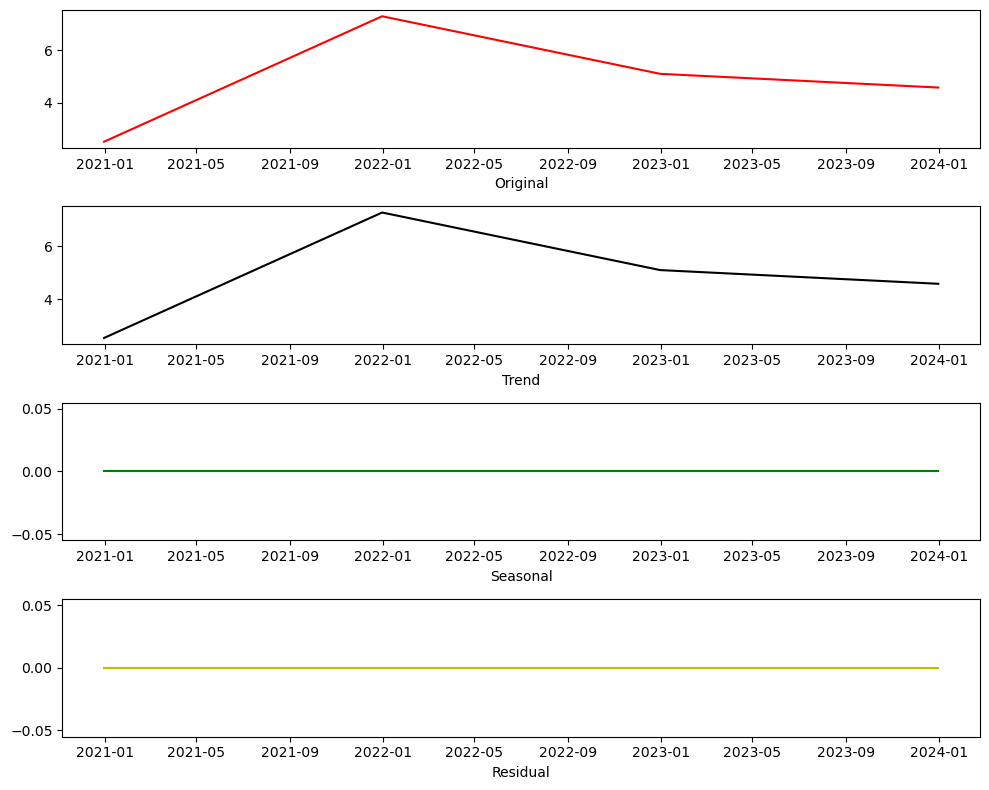

In [209]:
# Now we break the data into sub section
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values with interpolation
resample_data.interpolate(method='linear', inplace=True)

# Decompose the data
decomp = seasonal_decompose(resample_data, period=1)
# decomp = seasonal_decompose(resample_data, period=2)
# decomp = seasonal_decompose(resample_data, period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plot the results
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(resample_data, 'r-')
plt.xlabel('Original')
plt.savefig('Original_1.jpeg')
plt.subplot(412)
plt.plot(trend, 'k-')
plt.xlabel('Trend')
plt.savefig('Trend_1.jpeg')
plt.subplot(413)
plt.plot(seasonal, 'g-')
plt.xlabel('Seasonal')
plt.savefig('Seasonal_1.jpeg')
plt.subplot(414)
plt.plot(residual, 'y-')
plt.xlabel('Residual')
plt.savefig('Residual_1.jpeg')
plt.tight_layout()


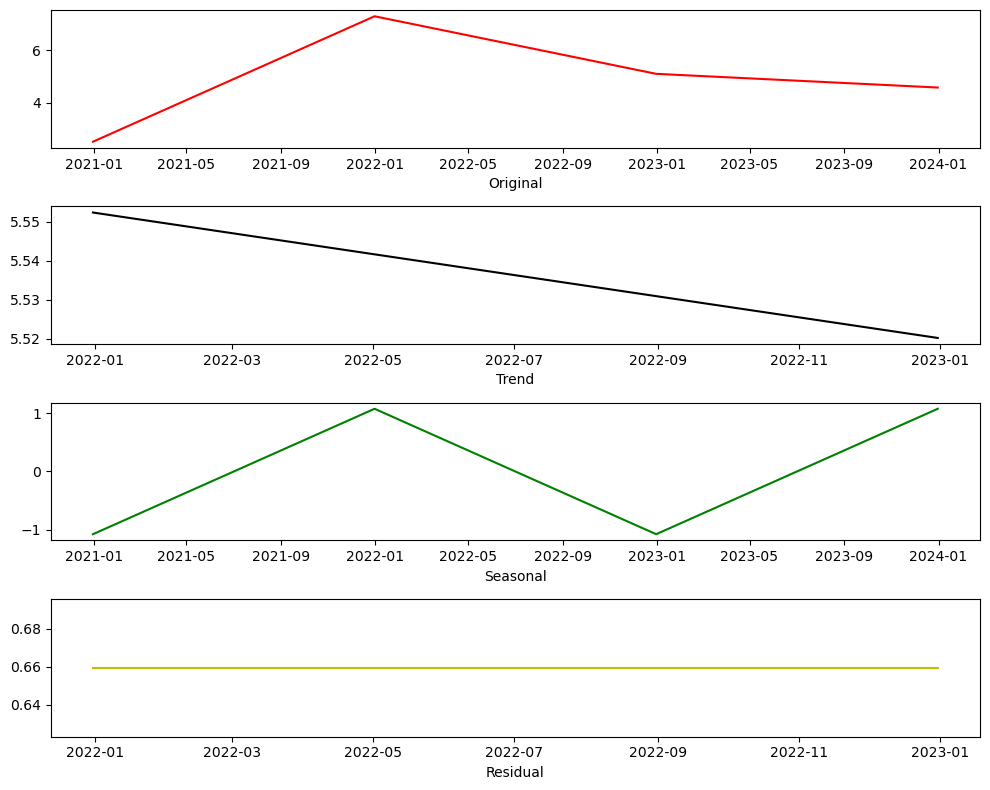

In [210]:
# Now we break the data into sub section
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values with interpolation
resample_data.interpolate(method='linear', inplace=True)

# Decompose the data
# decomp = seasonal_decompose(resample_data, period=1)
decomp = seasonal_decompose(resample_data, period=2)
# decomp = seasonal_decompose(resample_data, period=3)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plot the results
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(resample_data, 'r-')
plt.xlabel('Original')
plt.savefig('Original_2.jpeg')
plt.subplot(412)
plt.plot(trend, 'k-')
plt.xlabel('Trend')
plt.savefig('Trend_2.jpeg')
plt.subplot(413)
plt.plot(seasonal, 'g-')
plt.xlabel('Seasonal')
plt.savefig('Seasonal_2.jpeg')
plt.subplot(414)
plt.plot(residual, 'y-')
plt.xlabel('Residual')
plt.savefig('Residual_2.jpeg')
plt.tight_layout()


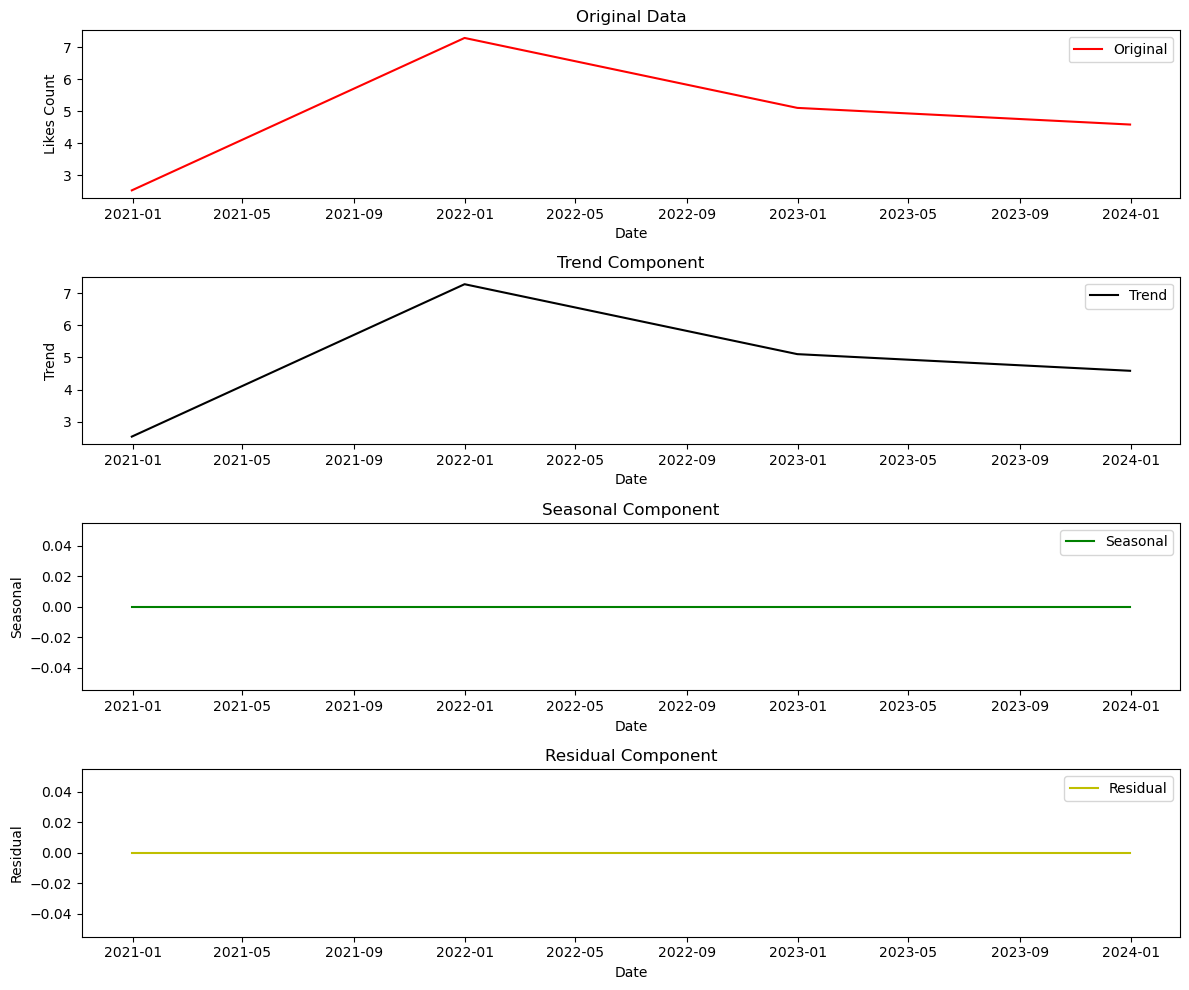

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample data for demonstration; replace with your actual DataFrame
# recent_data = pd.DataFrame({'Year': [2022, 2023, 2022, 2023], 'likesCount': [10, 20, 15, 25]})

# Resample data
resample_data = recent_data[['likesCount']].resample('A').mean()

# Fill missing values with interpolation
resample_data.interpolate(method='linear', inplace=True)

# Decompose the data (adjust period based on your data's frequency)
decomp = seasonal_decompose(resample_data, period=1)  # Adjust period as needed
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plot the results
plt.figure(figsize=(12, 10))

# Plot Original Data
plt.subplot(411)
plt.plot(resample_data, 'r-', label='Original')
plt.xlabel('Date')
plt.ylabel('Likes Count')
plt.title('Original Data')
plt.legend()

# Plot Trend
plt.subplot(412)
plt.plot(trend, 'k-', label='Trend')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.title('Trend Component')
plt.legend()

# Plot Seasonal
plt.subplot(413)
plt.plot(seasonal, 'g-', label='Seasonal')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.title('Seasonal Component')
plt.legend()

# Plot Residual
plt.subplot(414)
plt.plot(residual, 'y-', label='Residual')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()

# Save plots as images
plt.savefig('Decomposition_Plots.jpeg')

# Display the plots
plt.show()


<h2> 
A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

 - Level: The average value in the series.
 - Trend: The increasing or decreasing value in the series.
 - Seasonality: The repeating short-term cycle in the series.
 - Noise: The random variation in the series.
</h2>.

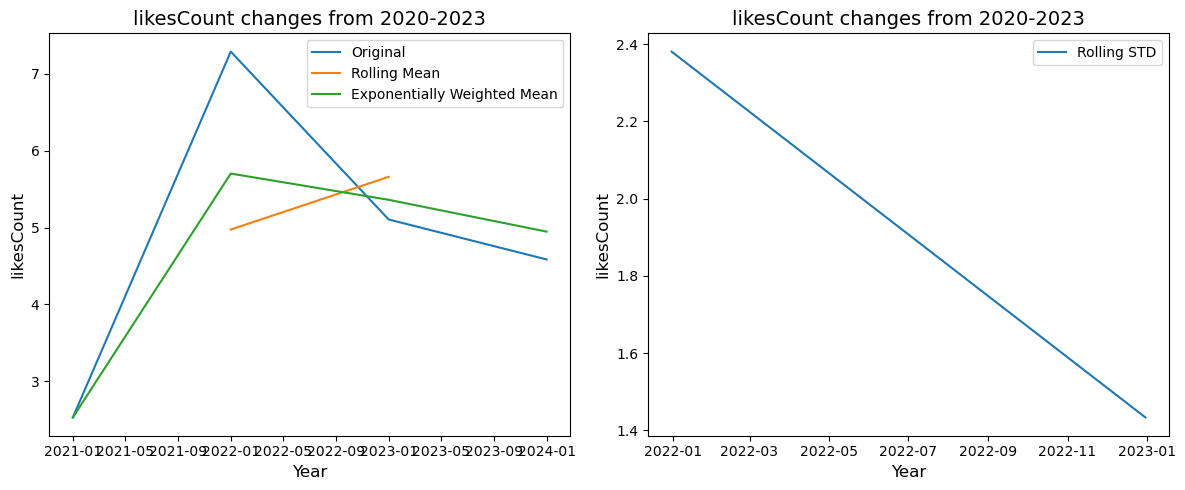

In [212]:
rol_mean = resample_data.rolling(window=3,center=True).mean()
ewm = resample_data.ewm(span=3).mean()
rol_std = resample_data.rolling(window=3,center=True).std()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_data,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('likesCount changes from 2020-2023',fontsize=14)
plt.savefig('Rolling Mean_likesCount changes from 2020-2023.jpeg')
ax1.set_ylabel('likesCount',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('likesCount changes from 2020-2023',fontsize=14)
plt.savefig('Rolling STD_likesCount changes from 2020-2023.jpeg')
ax2.set_ylabel('likesCount',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()



plt.tight_layout()
plt.show()

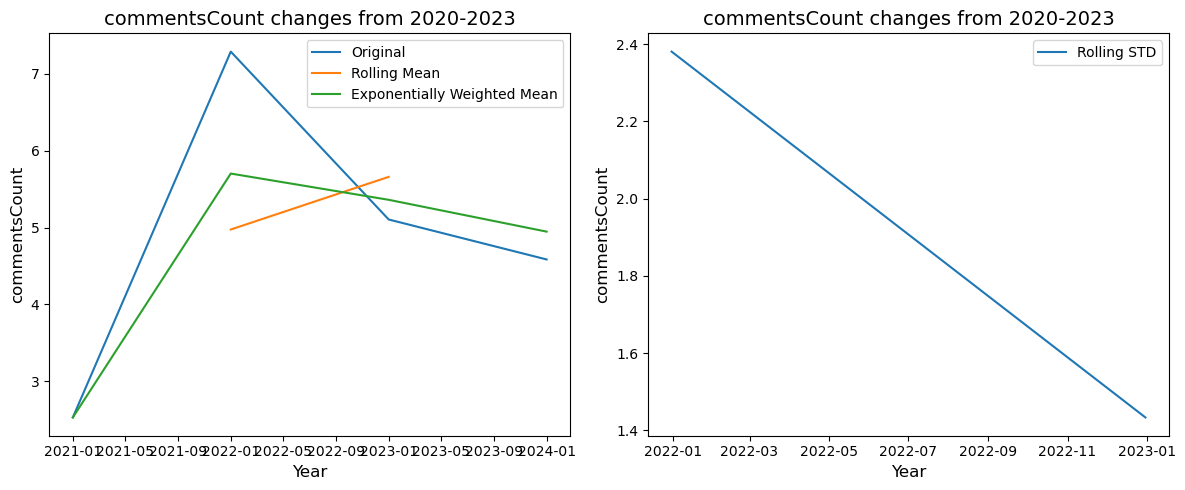

In [213]:
rol_mean = resample_data.rolling(window=3,center=True).mean()
ewm = resample_data.ewm(span=3).mean()
rol_std = resample_data.rolling(window=3,center=True).std()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(resample_data,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title('commentsCount changes from 2020-2023',fontsize=14)
plt.savefig('Rolling Mean_commentsCount changes from 2020-2023.jpeg')
ax1.set_ylabel('commentsCount',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('commentsCount changes from 2020-2023',fontsize=14)
plt.savefig('Rolling STD_commentsCount changes from 2020-2023.jpeg')
ax2.set_ylabel('commentsCount',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()



plt.tight_layout()
plt.show()

In [214]:
# Explore the dataset
df = pd.read_csv('climate_nasa.csv')
print(df.head())
print(df.info())
print(df.describe())

                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har


# Model Evaluation:


In [215]:
# Model Evaluation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
df = pd.read_csv('climate_nasa.csv')

# Print column names
print(df.columns)

# Convert 'date' column to timestamps
df['date'] = pd.to_datetime(df['date']).apply(pd.Timestamp.timestamp)

# Split data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Define and fit the model
model = RandomForestRegressor()
model.fit(train.drop(['likesCount', 'profileName', 'commentsCount', 'text'], axis=1), train['likesCount'])

# Generate predictions
predictions = model.predict(test.drop(['likesCount', 'profileName', 'commentsCount', 'text'], axis=1))

# Evaluate model performance
mae = mean_absolute_error(test['likesCount'], predictions)
r2 = r2_score(test['likesCount'], predictions)

print('Model Evaluation Metrics:')
print('-------------------------')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')



Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')
Model Evaluation Metrics:
-------------------------
MAE: 6.82
R2: -0.34


# Hyperparameter Tuning:

In [216]:
# Hyperparameter Tuning

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a sample dataset
import numpy as np
X = np.random.rand(100, 1)
y = np.random.rand(100)

# Define the model
model = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(X, y)

# Print the results
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Hyperparameters: {'n_estimators': 50}
Best Score: -0.1019516575719133


In [217]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a sample dataset
X = np.random.rand(100, 1)
y = np.random.rand(100)

print("Dataset created")

# Define the model
model = RandomForestRegressor()

print("Model defined")

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100]
}

print("Hyperparameter grid defined")

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

print("Grid search defined")

# Fit the model
grid_search.fit(X, y)

print("Grid search fitted")
# Print the results
print('Best Hyperparameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)



Dataset created
Model defined
Hyperparameter grid defined
Grid search defined
Grid search fitted
Best Hyperparameters: {'n_estimators': 100}
Best Score: -0.09665558464948057


# Model Comparison:

In [218]:
# Model Comparison
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor()
svr_model = SVR()

# Fit models
rf_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])
svr_model.fit(train.index.values.reshape(-1, 1), train['likesCount'])

# Make predictions
rf_predictions = rf_model.predict(test.index.values.reshape(-1, 1))
svr_predictions = svr_model.predict(test.index.values.reshape(-1, 1))

# Evaluate models
print('Random Forest MSE:', mean_squared_error(test['likesCount'], rf_predictions))
print('SVR MSE:', mean_squared_error(test['likesCount'], svr_predictions))


Random Forest MSE: 57.63332585666834
SVR MSE: 70.30429193437038



# Visualization:

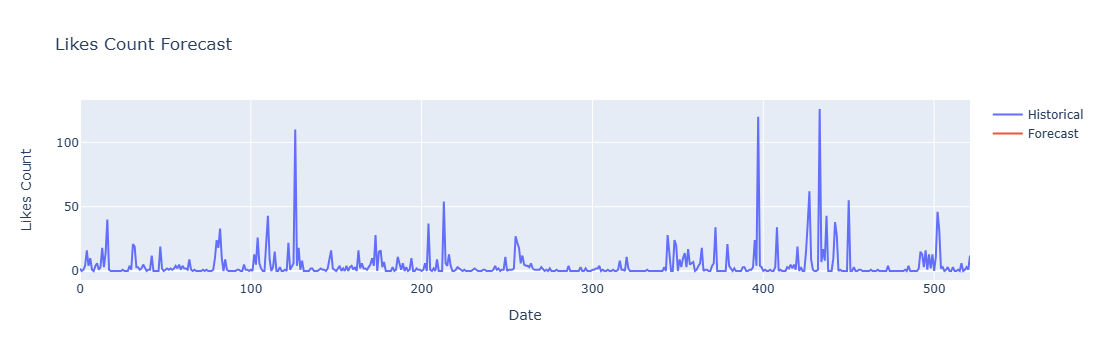

<Figure size 640x480 with 0 Axes>

In [533]:
# Visualization


import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
plt.savefig('Likes Count Forecast__001.jpeg')
fig.show()



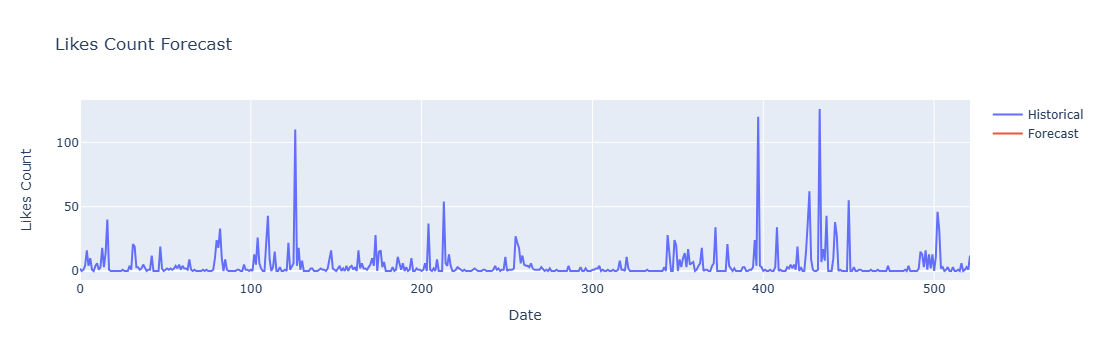

<Figure size 640x480 with 0 Axes>

In [534]:
# Visualization


import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
plt.savefig('Likes Count Forecast__002.jpeg')
fig.show()



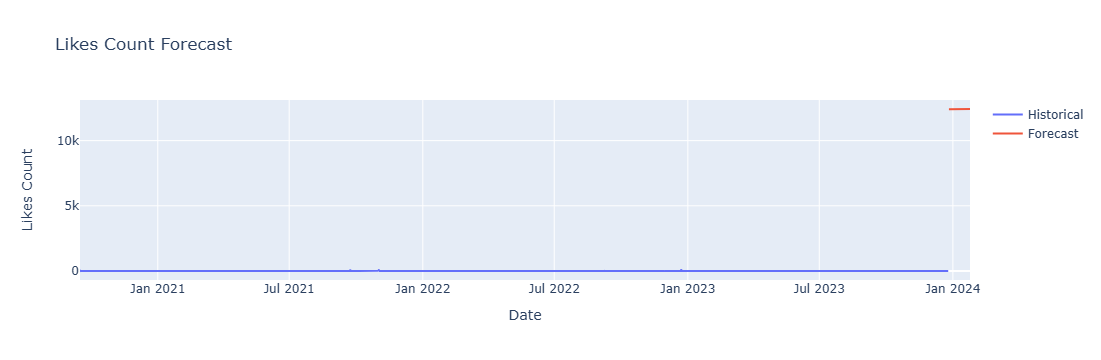

In [219]:
# Visualization


import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# Convert Index objects to Series objects
historical_dates = pd.Series(data.index, name='Date')
future_dates_series = pd.Series(future_dates, name='Date')

# Create interactive visualization
fig = go.Figure(data=[
    go.Scatter(x=historical_dates, y=data['likesCount'], name='Historical'),
    go.Scatter(x=future_dates_series, y=future_likes, name='Forecast')
])

fig.update_layout(title='Likes Count Forecast', xaxis_title='Date', yaxis_title='Likes Count')
# plt.savefig('Likes Count Forecast__002.jpeg')
fig.show()




# Scenario Analysis:

In [535]:
# Scenario Analysis
# Define scenario parameters
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

scenario_params = {'increase': 0.1, 'decrease': -0.1}

# Evaluate scenario impact
for scenario, param in scenario_params.items():
    # Modify likesCount data according to scenario
    data_scenario = data['likesCount'] * (1 + param)
    
    # Re-run modeling and forecasting steps
    X = data_scenario.index.values.reshape(-1, 1)
    y = data_scenario.values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=30)
    
    # Print scenario-specific results
    print(f'Scenario {scenario} results:')
    print(f'Forecasted values: {forecast}')
    print(f'Model parameters: {model_fit.params}')
    # print(f'Model parameters: {pd.Series(model_fit.params)}')

    print('------------------------')


Scenario increase results:
Forecasted values: [ 6.98388913  7.07778846  8.22380556  9.88794279 11.06773256  9.69865007
  8.816638    9.00994843  9.40379098  9.69023845  9.65330726  9.38710134
  9.31067206  9.39043626  9.47285501  9.49427364  9.45676521  9.417173
  9.41952171  9.43987043  9.45145916  9.44835714  9.43920936  9.43518788
  9.43823215  9.44202897  9.44281115  9.44121872  9.43971519  9.43968996]
Model parameters: [-8.06556332e-01 -6.19769630e-01 -5.05395058e-01 -3.47532662e-01
 -1.67533081e-01  1.95292330e+02]
------------------------
Scenario decrease results:
Forecasted values: [5.71414044 5.79101399 6.72855282 8.09018065 9.05542788 7.93527156
 7.21365887 7.37181672 7.6940326  7.92840615 7.89818249 7.68038388
 7.61785634 7.6831146  7.75054502 7.76806985 7.73738094 7.70498917
 7.70691121 7.72355918 7.73304036 7.73050248 7.72301817 7.7197282
 7.72221887 7.72532513 7.72596504 7.72466221 7.72343213 7.72341152]
Model parameters: [ -0.80655637  -0.61976621  -0.50538797  -0.34753

In [536]:
# Scenario Analysis
# Define scenario parameters
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

scenario_params = {'increase': 0.1, 'decrease': -0.1}

# Evaluate scenario impact
for scenario, param in scenario_params.items():
    # Modify likesCount data according to scenario
    data_scenario = data['likesCount'] * (1 + param)
    
    # Re-run modeling and forecasting steps
    X = data_scenario.index.values.reshape(-1, 1)
    y = data_scenario.values
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=30)
    
    # Print scenario-specific results
    print(f'Scenario {scenario} results:')
    print(f'Forecasted values: {forecast}')
    # print(f'Model parameters: {model_fit.params}')
    print(f'Model parameters: {pd.Series(model_fit.params)}')

    print('------------------------')


Scenario increase results:
Forecasted values: [ 6.98388913  7.07778846  8.22380556  9.88794279 11.06773256  9.69865007
  8.816638    9.00994843  9.40379098  9.69023845  9.65330726  9.38710134
  9.31067206  9.39043626  9.47285501  9.49427364  9.45676521  9.417173
  9.41952171  9.43987043  9.45145916  9.44835714  9.43920936  9.43518788
  9.43823215  9.44202897  9.44281115  9.44121872  9.43971519  9.43968996]
Model parameters: 0     -0.806556
1     -0.619770
2     -0.505395
3     -0.347533
4     -0.167533
5    195.292330
dtype: float64
------------------------
Scenario decrease results:
Forecasted values: [5.71414044 5.79101399 6.72855282 8.09018065 9.05542788 7.93527156
 7.21365887 7.37181672 7.6940326  7.92840615 7.89818249 7.68038388
 7.61785634 7.6831146  7.75054502 7.76806985 7.73738094 7.70498917
 7.70691121 7.72355918 7.73304036 7.73050248 7.72301817 7.7197282
 7.72221887 7.72532513 7.72596504 7.72466221 7.72343213 7.72341152]
Model parameters: 0     -0.806556
1     -0.619766
2    


# Uncertainty Quantification:

In [537]:
# Uncertainty Quantification
import numpy as np

import pandas as pd

# Assuming 'climate_nasa.csv' is the data file
data = pd.read_csv('climate_nasa.csv')

# Perform Monte Carlo simulations
simulations = 1000
likesCount_simulations = np.zeros((simulations, len(data)))

for i in range(simulations):
    likesCount_simulations[i] = data['likesCount'] + np.random.normal(scale=data['likesCount'].std(), size=len(data))

# Calculate uncertainty metrics
mean_simulation = likesCount_simulations.mean(axis=0)
std_simulation = likesCount_simulations.std(axis=0)

print('Mean Simulation:', mean_simulation)
print('Standard Deviation Simulation:', std_simulation)


Mean Simulation: [ 2.12969640e+00 -4.02216761e-01  1.33407214e+00  4.52785050e+00
  1.63824578e+01  4.65628481e+00  1.04029758e+01  1.34451228e+00
 -2.27294459e-01  4.74474681e+00  6.17416863e+00  9.47407051e-01
  3.19408708e+00  1.76362965e+01  2.72236122e+00  1.40344153e+01
  4.13311888e+01  1.73685604e+00 -8.04603543e-01 -2.21689429e-01
 -1.08483581e-01  2.03195556e-01  1.54664054e-01 -1.87577988e-01
 -3.93883925e-01  5.64769401e-01 -2.23742238e-01  7.56059881e-01
  1.97823610e-01  3.70991798e+00  8.91543981e-01  2.15580107e+01
  1.89420405e+01  3.25126076e+00  3.16212483e+00  6.03338060e-01
  2.15561275e+00  4.38514521e+00  2.79035174e+00 -6.64512628e-01
  1.14104111e+00  1.28628051e+00  1.17753211e+01  5.96714675e-01
  1.96678270e-01  2.91151090e-01  2.66189222e-01  1.85883061e+01
  1.75017101e+00 -1.29312858e-01  6.23598986e-01  1.30758045e+00
  1.49700877e+00  2.39058680e+00  1.00746987e+00  1.28298384e+00
  3.81234527e+00  1.75899143e+00  4.90765284e+00  1.06629211e+00
  3.8840